In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [2]:
data_1970 = pd.read_excel("Excel1.xlsx",sheet_name='y1970')
data_1978 = pd.read_excel("Excel1.xlsx",sheet_name='y1978')
data_1987 = pd.read_excel("Excel1.xlsx",sheet_name='y1987')

In [3]:
Wdata_1970 = Bdata_1970 = Mdata_1970= Jdata_1970 = Rdata_1970 = data_1970
Wdata_1978 = Bdata_1978 = Mdata_1978= Jdata_1978 = Rdata_1978 = data_1978
Wdata_1987 = Bdata_1987 = Mdata_1987= Jdata_1987 = Rdata_1987 =data_1987

In [144]:
crops = ['YBAJRA','YRICE','YMAIZE','YJOWAR','YWHEAT']
crops_area = ['ABAJRA','ARICE','AMAIZE','AJOWAR','AWHEAT']
crops_hyvarea = ['HYVBAJRA','HYVRICE','HYVMAIZE','HYVJOWAR','HYVWHEAT']
prod_crops = ['QBAJRA','QRICE','QMAIZE','QJOWAR','QWHEAT']
northern_satates = ['HARYANA','PUNJAB','UTTAR_PRADESH','MADHYA_PRADESH','RAJASTHAN','MAHARASHTRA','GUJARAT',]
south_states = ['ANDHRA_PRADESH','KARNATAKA','TAMIL_NADU']
east_india = ['WEST_BENGAL','ORISSA','BIHAR']

Bdata_1970 = Bdata_1970[Bdata_1970['YBAJRA']<37]

In [252]:
production_each_crop=[]
for col in Wdata_1970.columns:
    if(col[0]=='Q' and col not in ['QBULLOCK',
 'QTRACTOR',
 'QLABOR',
 'QNITRO',
 'QP2O5',
 'QK2O',
 'QLAND','QBULLHA',
 'QTRACHA']):
        production_each_crop.append(col)

# Distribution of major crop production in states

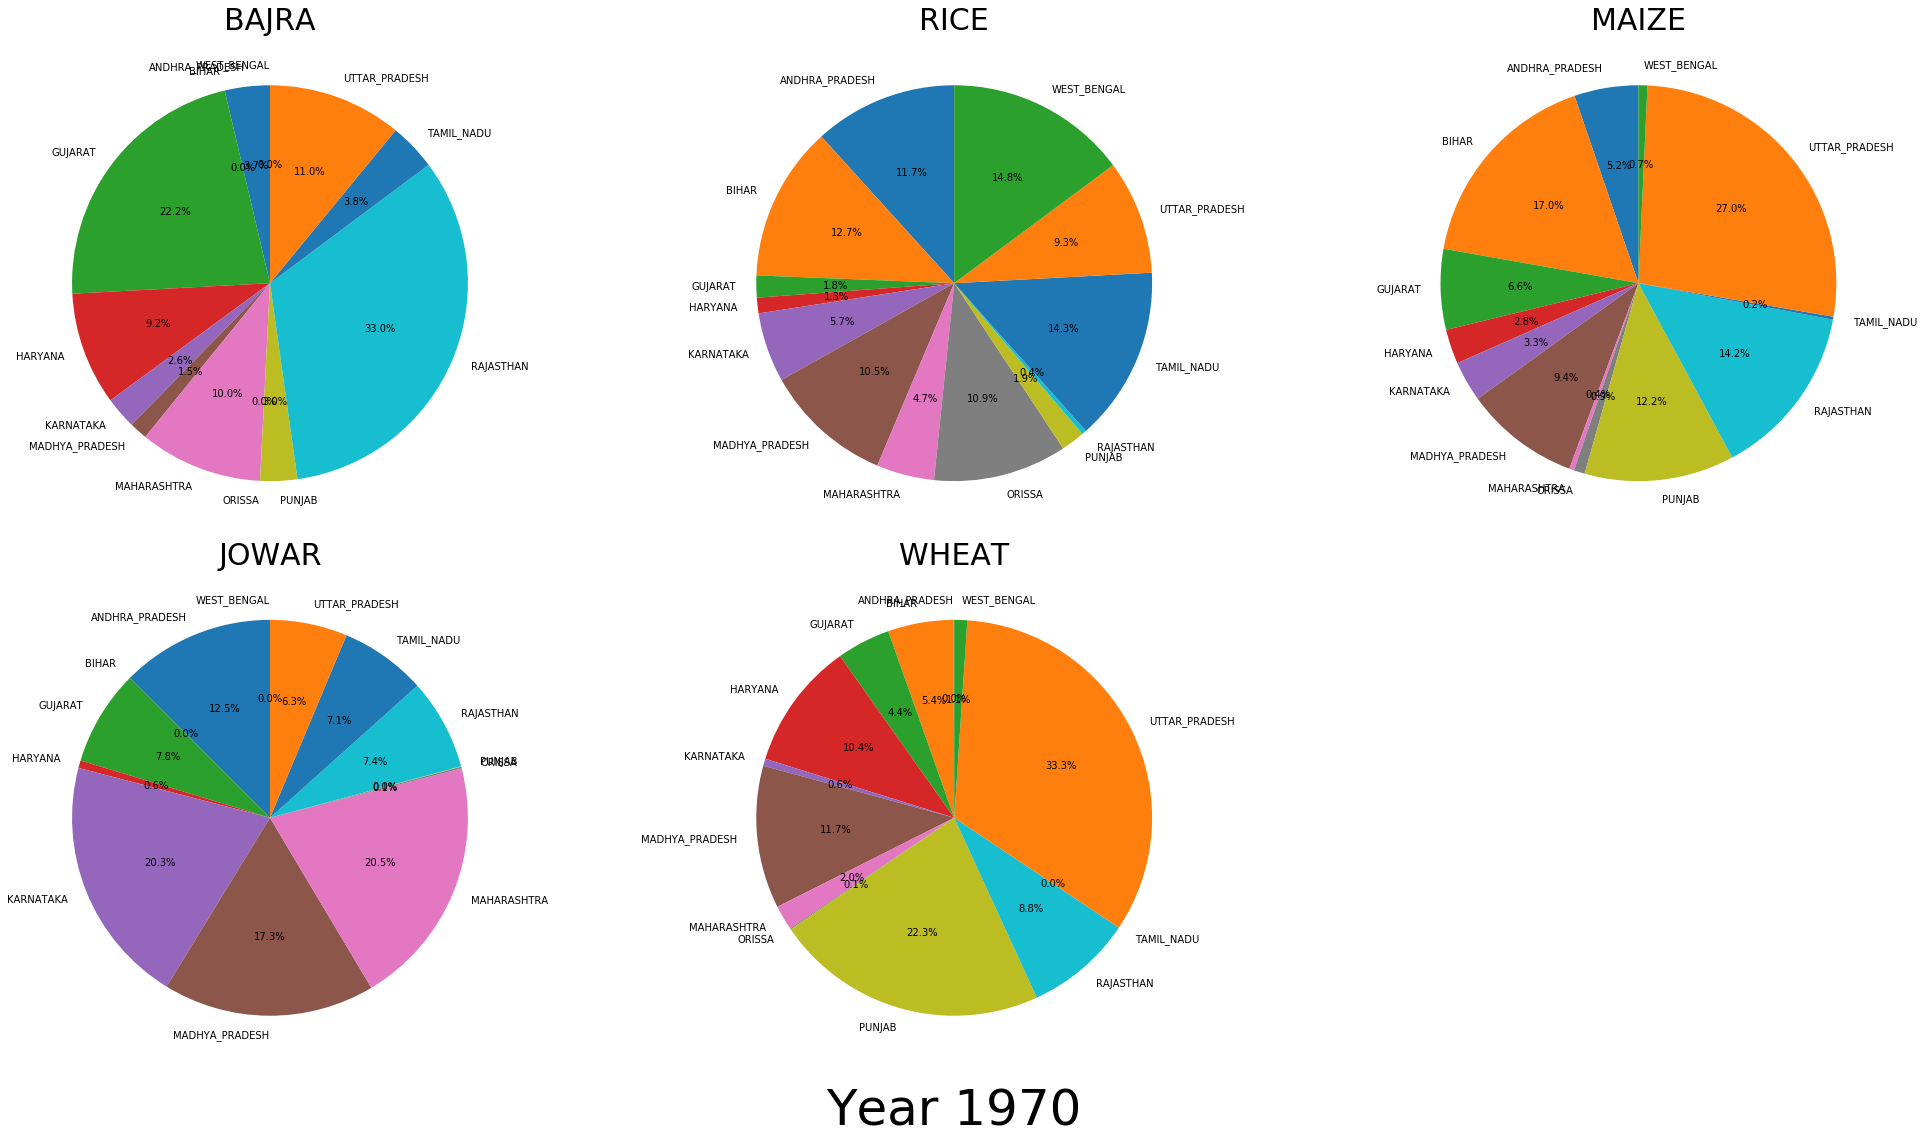

In [162]:
# data_1970.groupby('STATENAM').sum()[area_each_crop].T.iloc[0].plot.pie(subplots=True,figsize=(10,10))
fig,ax=plt.subplots(2,3,figsize=(30,15))
ax[1][2].set_visible(False)
axes=ax.flatten()
for i in range(len(axes)-1):
    axes[i].pie(data_1970.groupby('STATENAM').sum()[prod_crops].T.iloc[i],labels=data_1970.groupby('STATENAM').sum()[prod_crops].T.iloc[i].index, autopct='%1.1f%%',
         startangle=90)
    axes[i].set_title(prod_crops[i][1:],fontsize=30)
plt.suptitle('Year 1970',fontsize=50,y=-0.01)
# df.T.plot.pie(subplots=True, figsize=(10, 3))
# plt.legend(data_1970.groupby('STATENAM').sum()[area_each_crop].T.index)
plt.savefig('Year1970_production_major_crops.png')
plt.show()

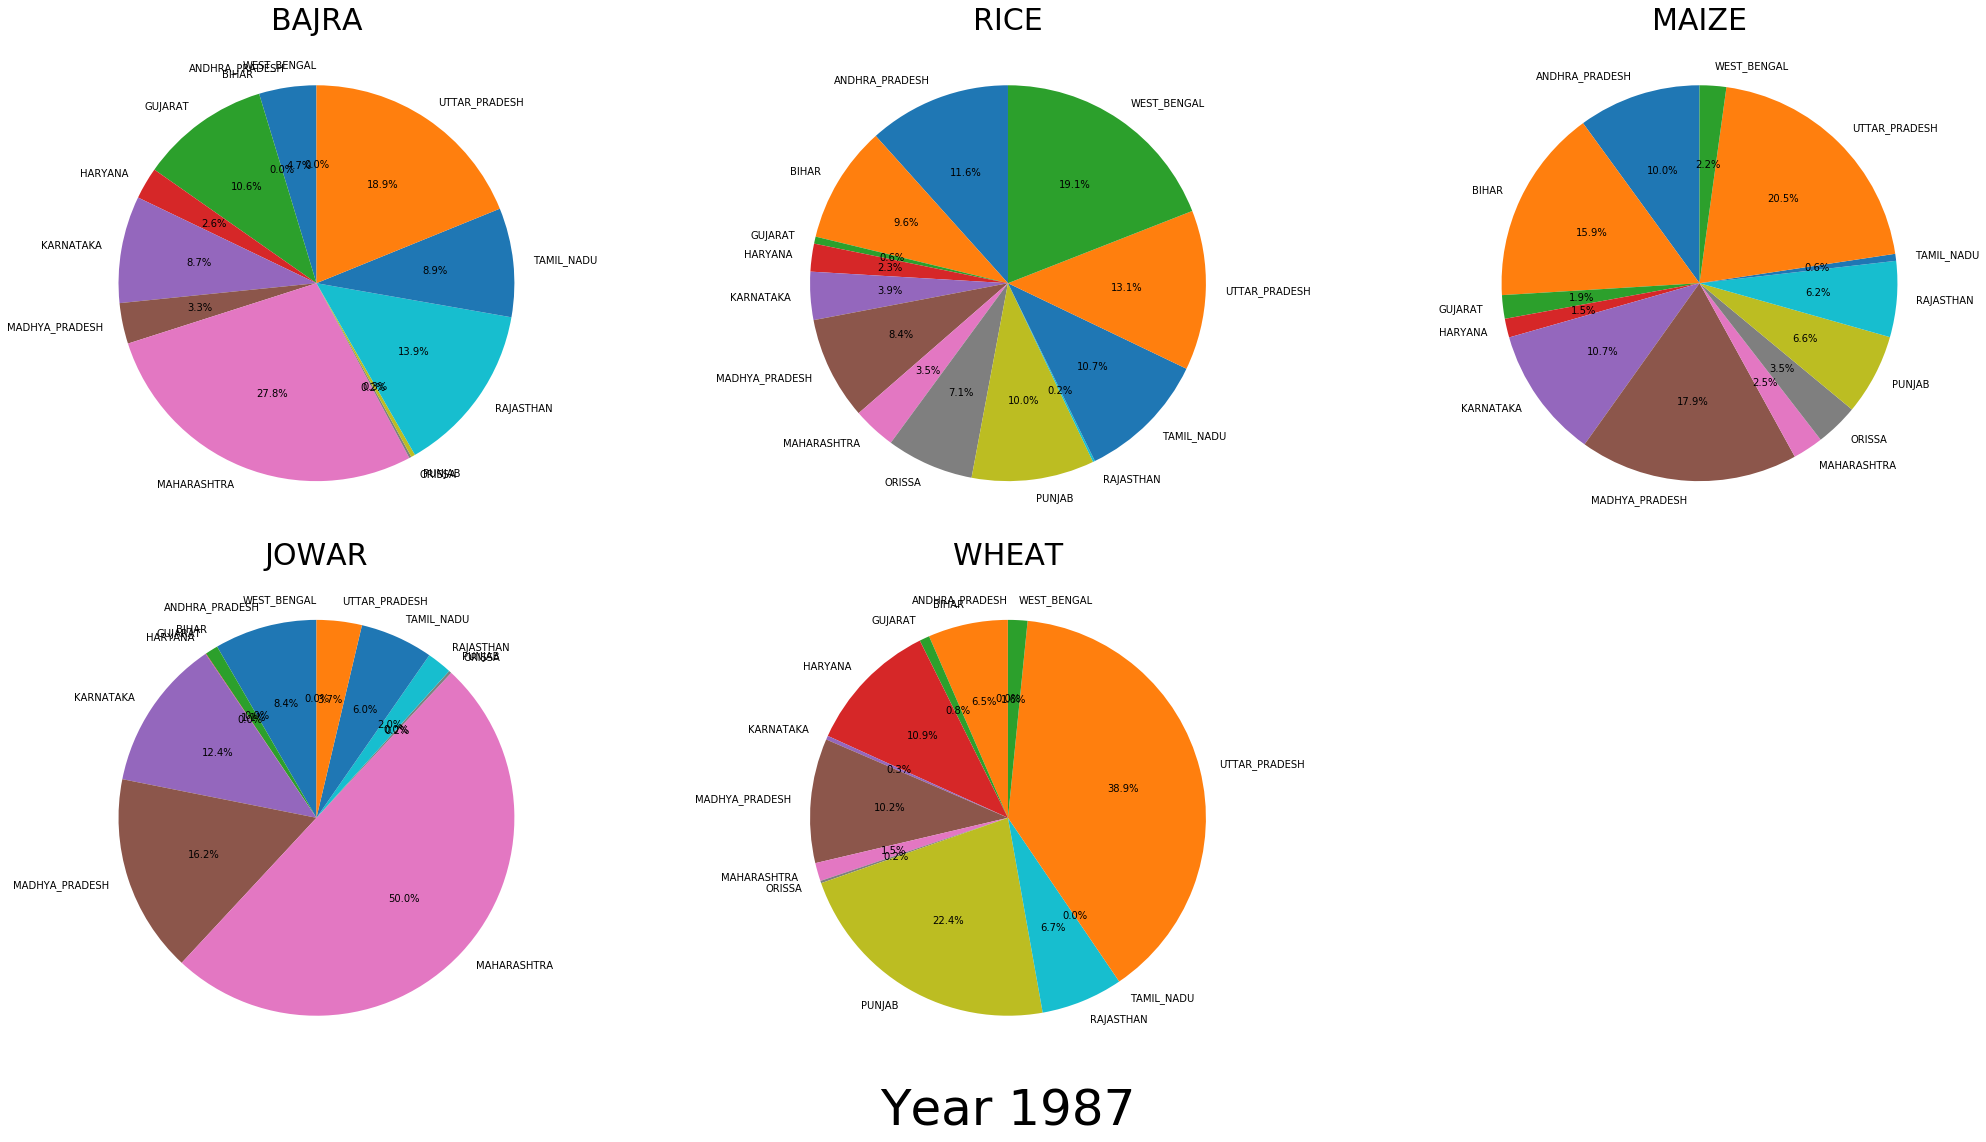

In [198]:
# data_1970.groupby('STATENAM').sum()[area_each_crop].T.iloc[0].plot.pie(subplots=True,figsize=(10,10))
fig,ax=plt.subplots(2,3,figsize=(30,15))
ax[1][2].set_visible(False)
axes=ax.flatten()
for i in range(len(axes)-1):
    axes[i].pie(data_1987.groupby('STATENAM').sum()[prod_crops].T.iloc[i],labels=data_1987.groupby('STATENAM').sum()[prod_crops].T.iloc[i].index, autopct='%1.1f%%',
         startangle=90)
    axes[i].set_title(prod_crops[i][1:],fontsize=30)
plt.suptitle('Year 1987',fontsize=50,y=-0.01)
# df.T.plot.pie(subplots=True, figsize=(10, 3))
# plt.legend(data_1970.groupby('STATENAM').sum()[area_each_crop].T.index)
plt.savefig('Year1987_production_major_crops.png')
plt.show()

In [222]:
# # data_1970.groupby('STATENAM').sum()[area_each_crop].T.iloc[0].plot.pie(subplots=True,figsize=(10,10))
# temp_1987 = data_1987.groupby('STATENAM').sum()[production_each_crop]
# fig,ax=plt.subplots(2,2,figsize=(30,20))
# # ax[4][1].set_visible(False)
# # ax[4][2].set_visible(False)
# axes=ax.flatten()
# for i in range(len(axes)):
#     axes[i].pie(temp_1987.iloc[i],labels=temp_1987.iloc[i].index, autopct='%1.1f%%',
#          startangle=90)
#     axes[i].set_title(temp_1987.index[i],fontsize=30)
# plt.suptitle('Year 1987',fontsize=50,y=-0.01)
# # df.T.plot.pie(subplots=True, figsize=(10, 3))
# # plt.legend(data_1970.groupby('STATENAM').sum()[area_each_crop].T.index)
# plt.savefig('Year1987_production_states_6.png')
# plt.show()

Index(['ANDHRA_PRADESH', 'BIHAR', 'GUJARAT', 'HARYANA', 'KARNATAKA',
       'MADHYA_PRADESH', 'MAHARASHTRA', 'ORISSA', 'PUNJAB', 'RAJASTHAN',
       'TAMIL_NADU', 'UTTAR_PRADESH', 'WEST_BENGAL'],
      dtype='object', name='STATENAM')

# Statewise crop production distribution

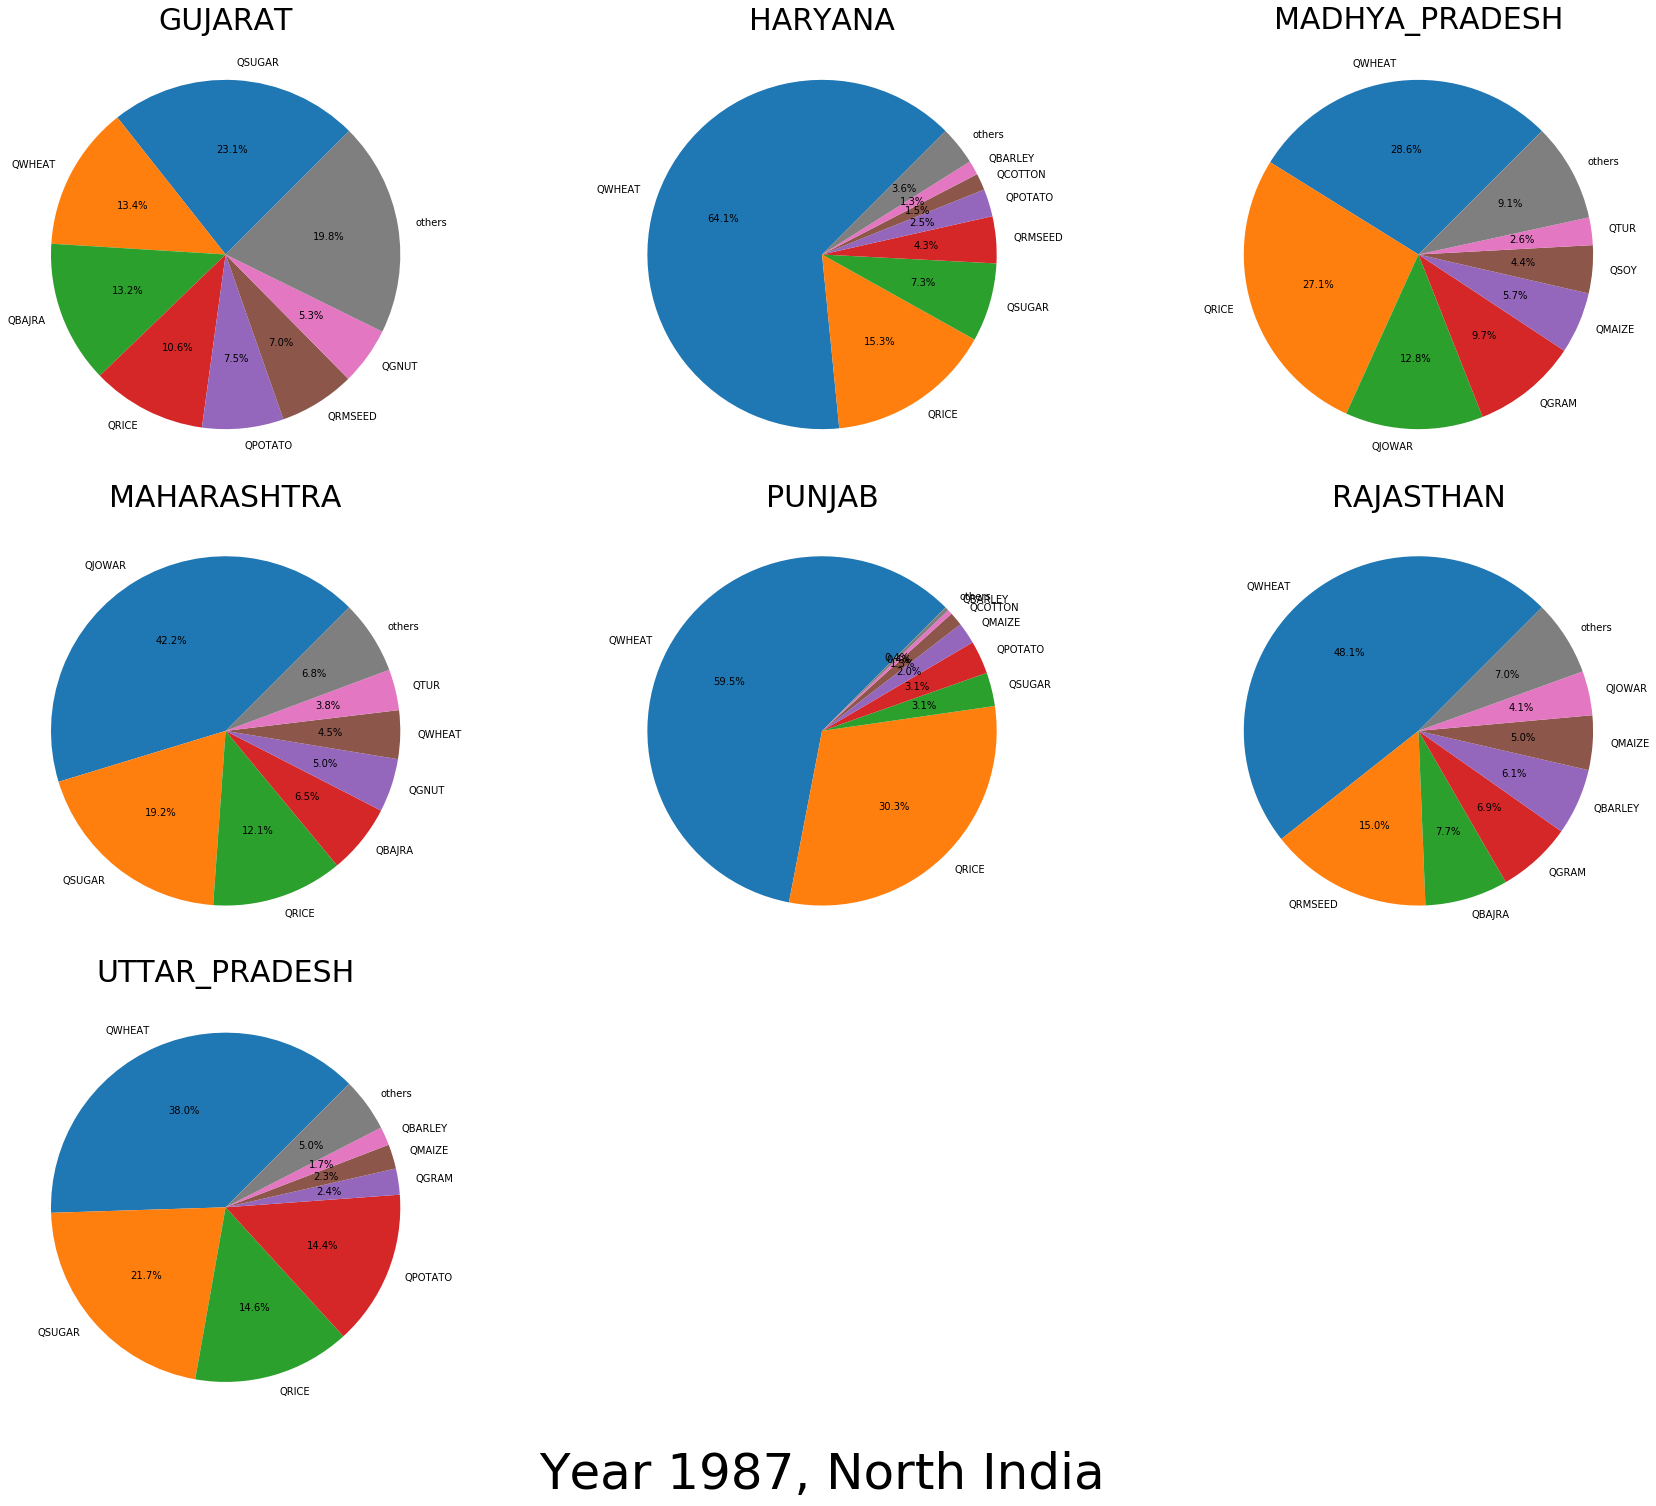

In [272]:
# data_1970.groupby('STATENAM').sum()[area_each_crop].T.iloc[0].plot.pie(subplots=True,figsize=(10,10))
temp_1987 = data_1987.groupby('STATENAM').sum()[production_each_crop]
fig,ax=plt.subplots(3,3,figsize=(25,20))
ax[2][1].set_visible(False)
ax[2][2].set_visible(False)
axes=ax.flatten()
j=0
i=0
while(i<len(list(temp_1987.index))):
    if temp_1987.index[i] in northern_satates:
        temp_series = temp_1987.iloc[i].nlargest(7)
        temp_series['others'] = temp_1987.iloc[i].sum() - temp_1987.iloc[i].nlargest(7).sum()
        axes[j].pie(temp_series,labels=temp_series.index, autopct='%1.1f%%',
             startangle=45)
        axes[j].set_title(temp_1987.index[i],fontsize=30)
        j+=1
    i+=1
plt.suptitle('Year 1987, North India',fontsize=50,y=-0.01)
# df.T.plot.pie(subplots=True, figsize=(10, 3))
# plt.legend(data_1970.groupby('STATENAM').sum()[area_each_crop].T.index)
plt.savefig('Year1987_production_states_north_india.png')
plt.show()

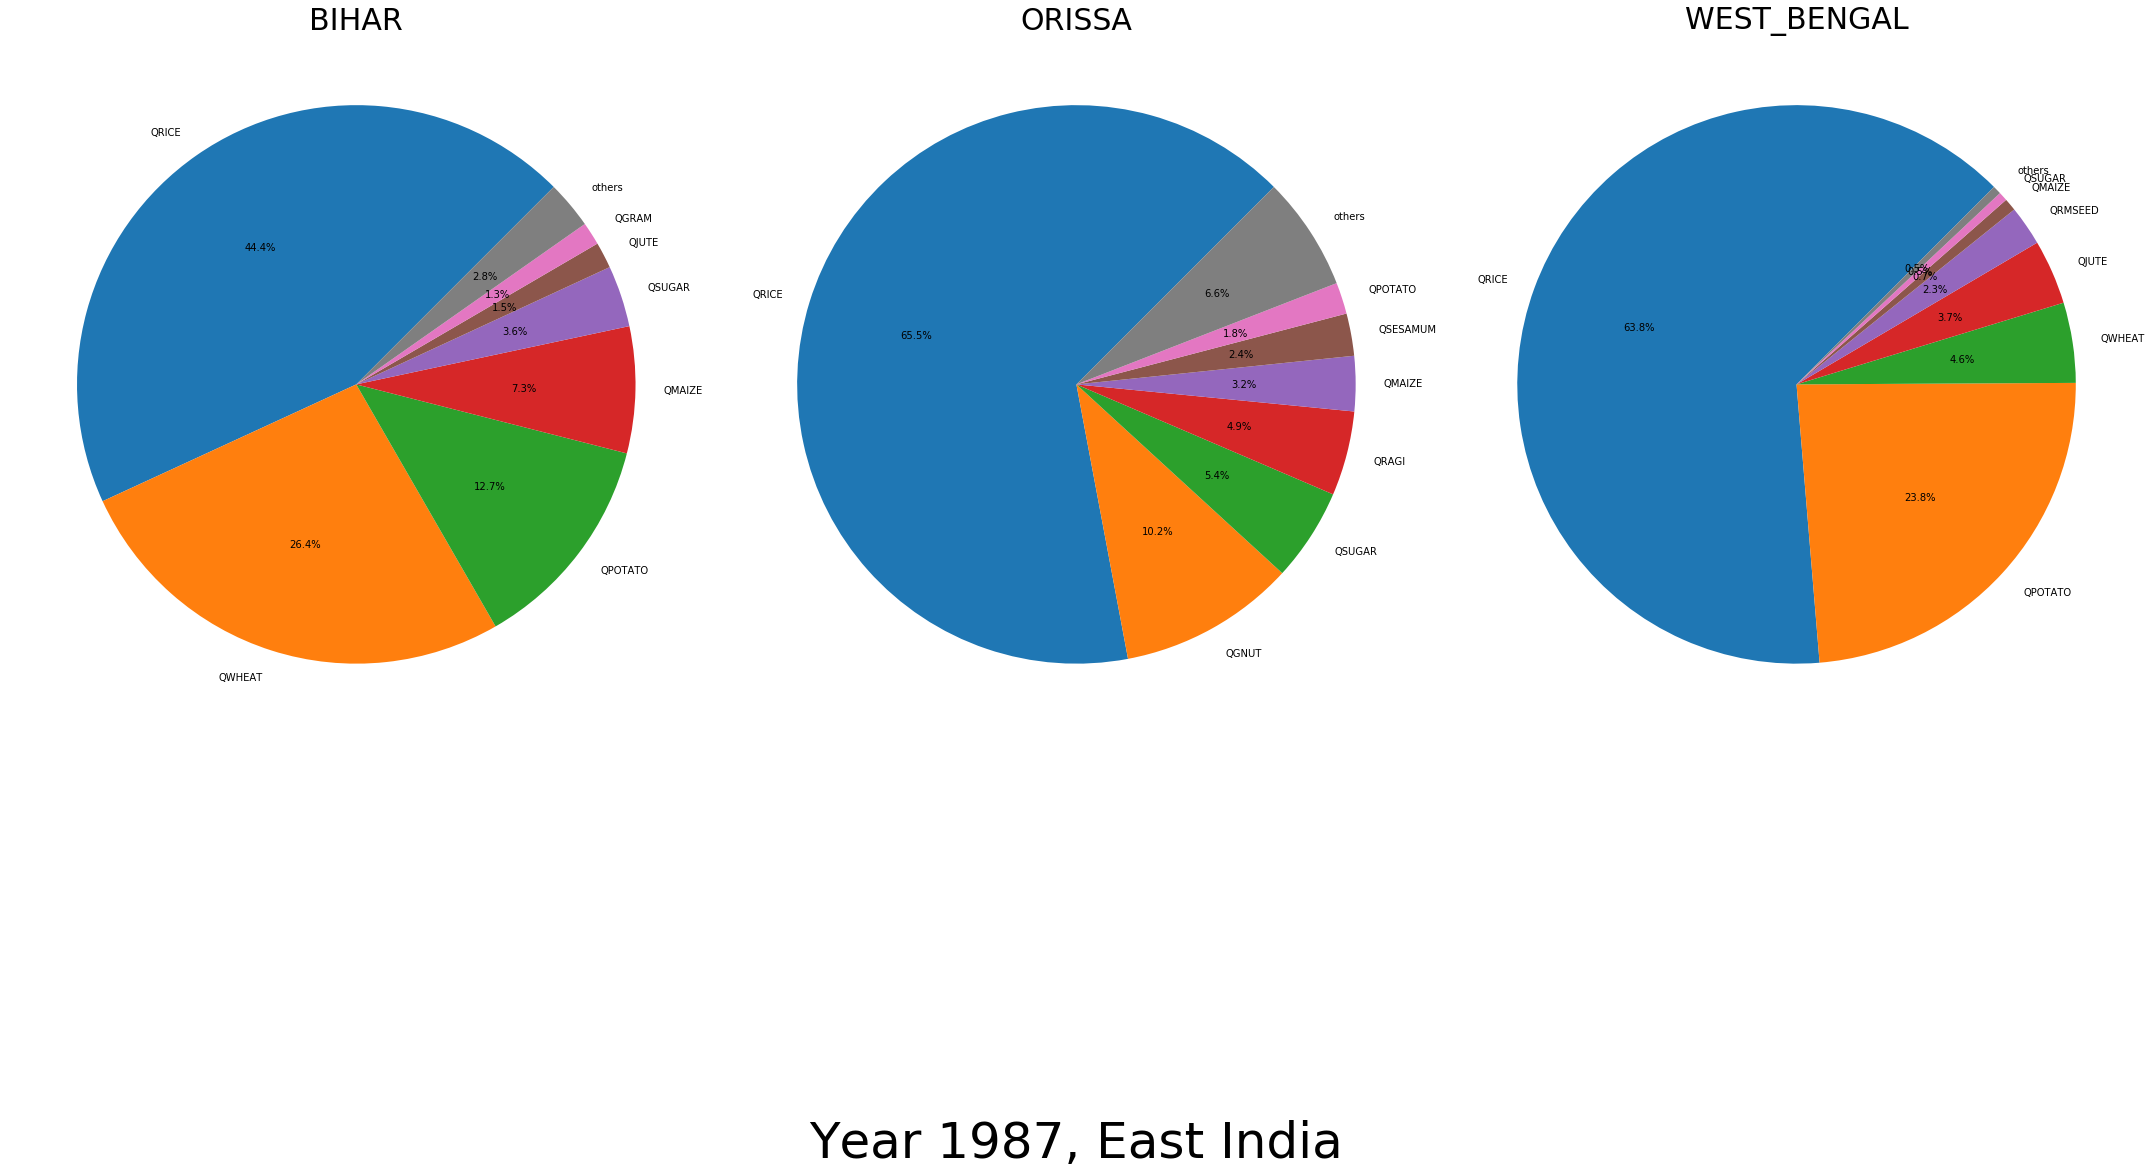

In [273]:
# data_1970.groupby('STATENAM').sum()[area_each_crop].T.iloc[0].plot.pie(subplots=True,figsize=(10,10))
fig,ax=plt.subplots(1,3,figsize=(30,20))
# ax[2][1].set_visible(False)
# ax[2][2].set_visible(False)
axes=ax.flatten()
j=0
i=0
while(i<len(list(temp_1987.index))):
    if temp_1987.index[i] in east_india:
        temp_series = temp_1987.iloc[i].nlargest(7)
        temp_series['others'] = temp_1987.iloc[i].sum() - temp_1987.iloc[i].nlargest(7).sum()
        axes[j].pie(temp_series,labels=temp_series.index, autopct='%1.1f%%',
             startangle=45)
        axes[j].set_title(temp_1987.index[i],fontsize=30)
#         texts[0].set_fontsize(100)
        j+=1
    i+=1
plt.suptitle('Year 1987, East India',fontsize=50,y=-0.01)
# df.T.plot.pie(subplots=True, figsize=(10, 3))
# plt.legend(data_1970.groupby('STATENAM').sum()[area_each_crop].T.index)
plt.savefig('Year1987_production_states_east_india.png')
plt.show()

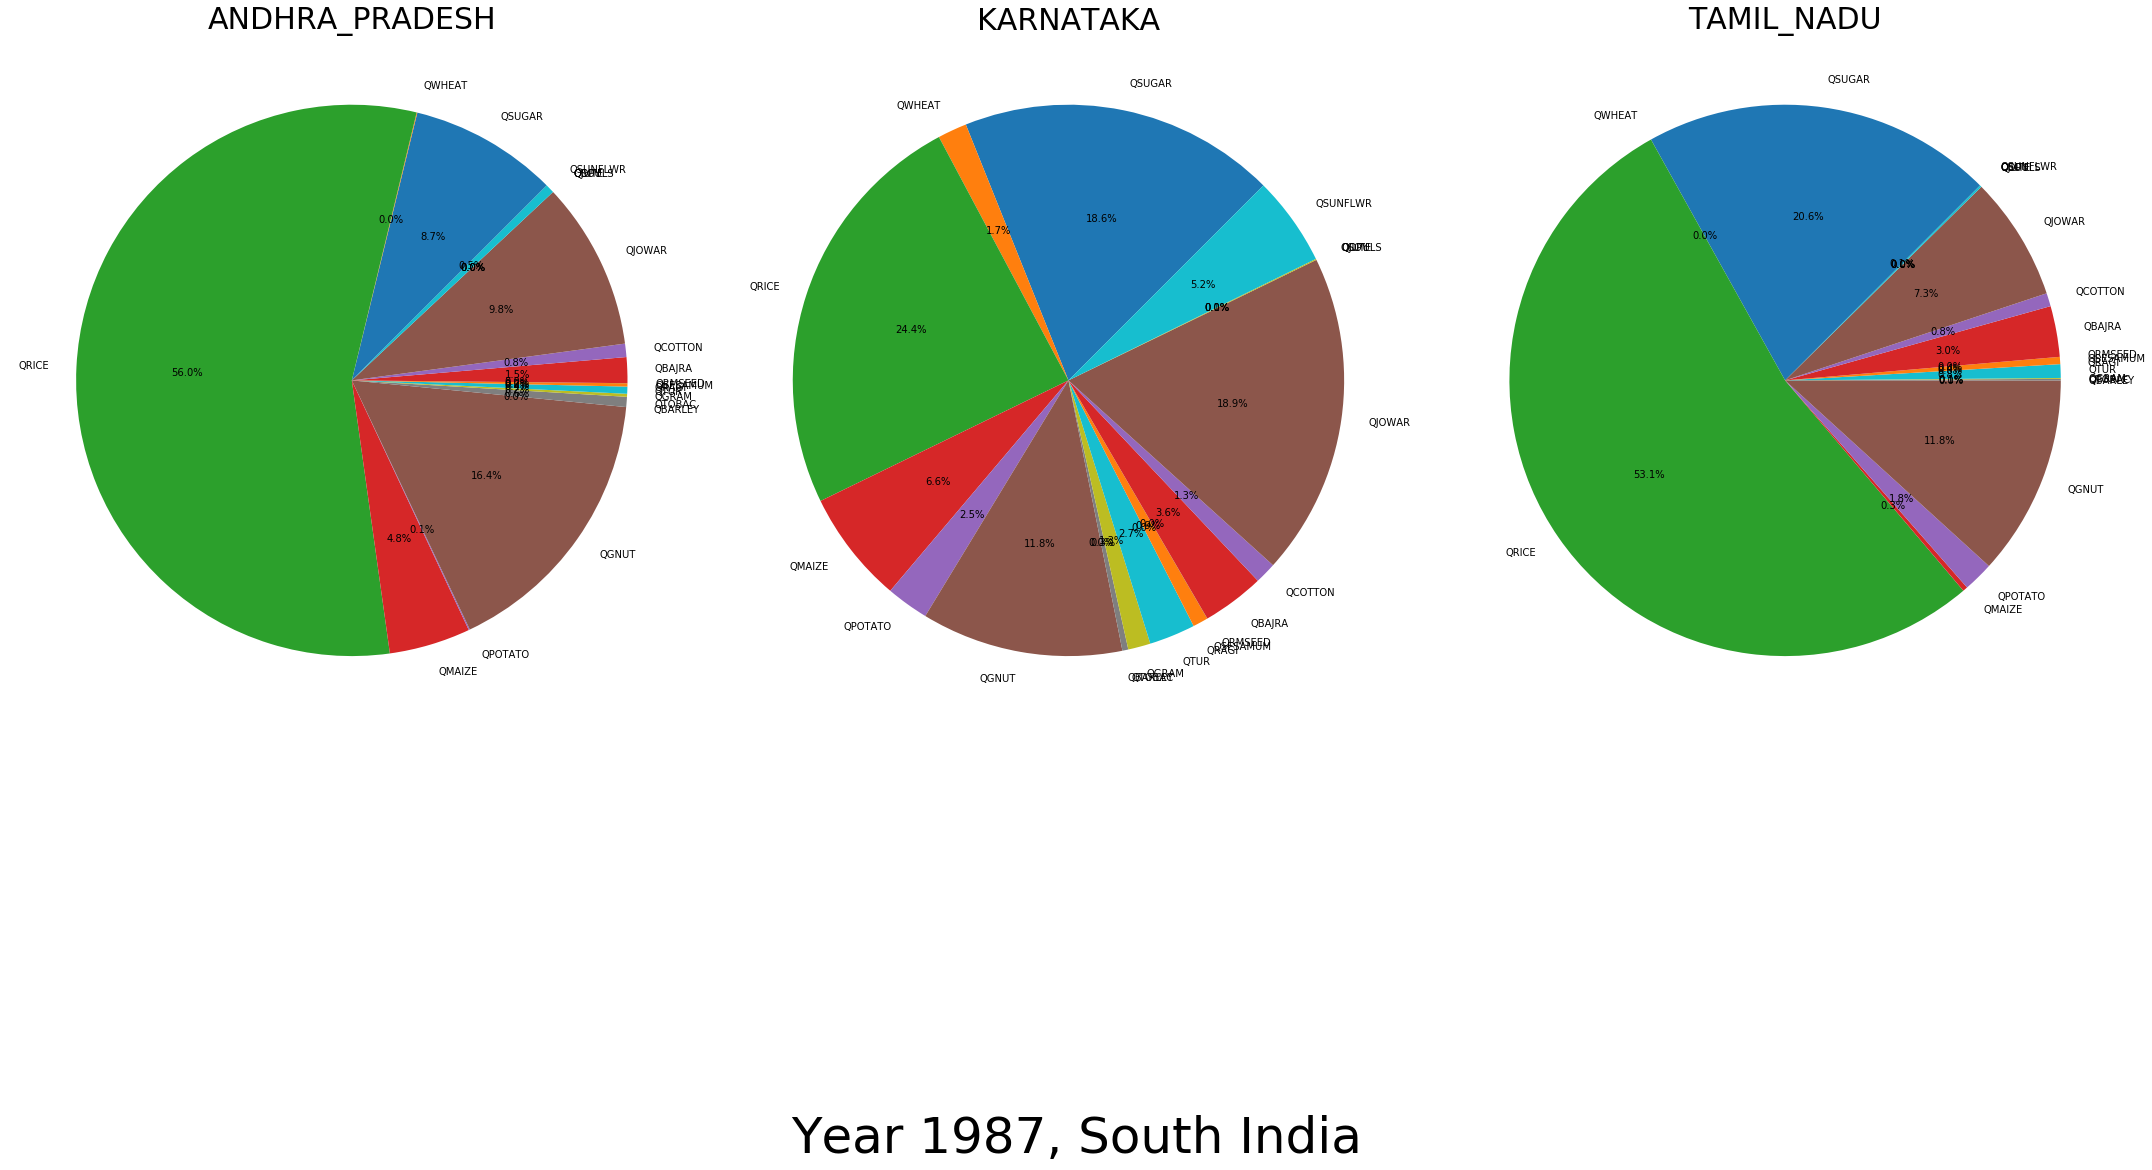

In [251]:
# data_1970.groupby('STATENAM').sum()[area_each_crop].T.iloc[0].plot.pie(subplots=True,figsize=(10,10))
fig,ax=plt.subplots(1,3,figsize=(30,20))
# ax[2][1].set_visible(False)
# ax[2][2].set_visible(False)
axes=ax.flatten()
j=0
i=0
while(i<len(list(temp_1987.index))):
    if temp_1987.index[i] in south_states:
        temp_series = temp_1987.iloc[i].nlargest(7)
        temp_series['others'] = temp_1987.iloc[i].sum() - temp_1987.iloc[i].nlargest(7).sum()
        axes[j].pie(temp_series,labels=temp_series.index, autopct='%1.1f%%',
             startangle=45)
        axes[j].set_title(temp_1987.index[i],fontsize=30)
#         texts[0].set_fontsize(100)
        j+=1
    i+=1
plt.suptitle('Year 1987, South India',fontsize=50,y=-0.01)
# df.T.plot.pie(subplots=True, figsize=(10, 3))
# plt.legend(data_1970.groupby('STATENAM').sum()[area_each_crop].T.index)
plt.savefig('Year1987_production_states_south_india.png')
plt.show()

In [6]:
for name in ['YBAJRA','YRICE','YMAIZE','YJOWAR','YWHEAT']:
    data_1978['growth_of_'+name+'_1970'] = ((data_1978[name]-data_1970[name]))
    data_1987['growth_of_'+name+'_1970'] = ((data_1987[name]-data_1970[name]))

In [7]:
all_data= pd.concat([data_1970,data_1978,data_1987])

c:\users\vikram jain\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [8]:
all_data['multiple_crop_index'] = all_data['GCA']/all_data['NCA']
all_data['irrigation_intensity_index']= all_data['NIA']/all_data['NCA']

# STATE WISE YIELD  and AREA GROWTH

In [228]:
yield_growth_state_wise_1978 = pd.DataFrame()
yield_growth_state_wise_1987 = pd.DataFrame()
for name in ['YBAJRA','YRICE','YMAIZE','YJOWAR','YWHEAT']:
    yield_growth_state_wise_1978[name] = (data_1978.groupby(['STATENAM']).sum()[name] - data_1970.groupby(['STATENAM']).sum()[name])
    yield_growth_state_wise_1987[name] = (data_1987.groupby(['STATENAM']).sum()[name] - data_1970.groupby(['STATENAM']).sum()[name])
                

In [229]:
area_growth_state_wise_1978 = pd.DataFrame()
area_growth_state_wise_1987 = pd.DataFrame()
for name in ['ABAJRA','ARICE','AMAIZE','AJOWAR','AWHEAT']:
    area_growth_state_wise_1978[name] = (data_1978.groupby(['STATENAM']).sum()[name] - data_1970.groupby(['STATENAM']).sum()[name])
    area_growth_state_wise_1987[name] = (data_1987.groupby(['STATENAM']).sum()[name] - data_1970.groupby(['STATENAM']).sum()[name])
                

### 1978

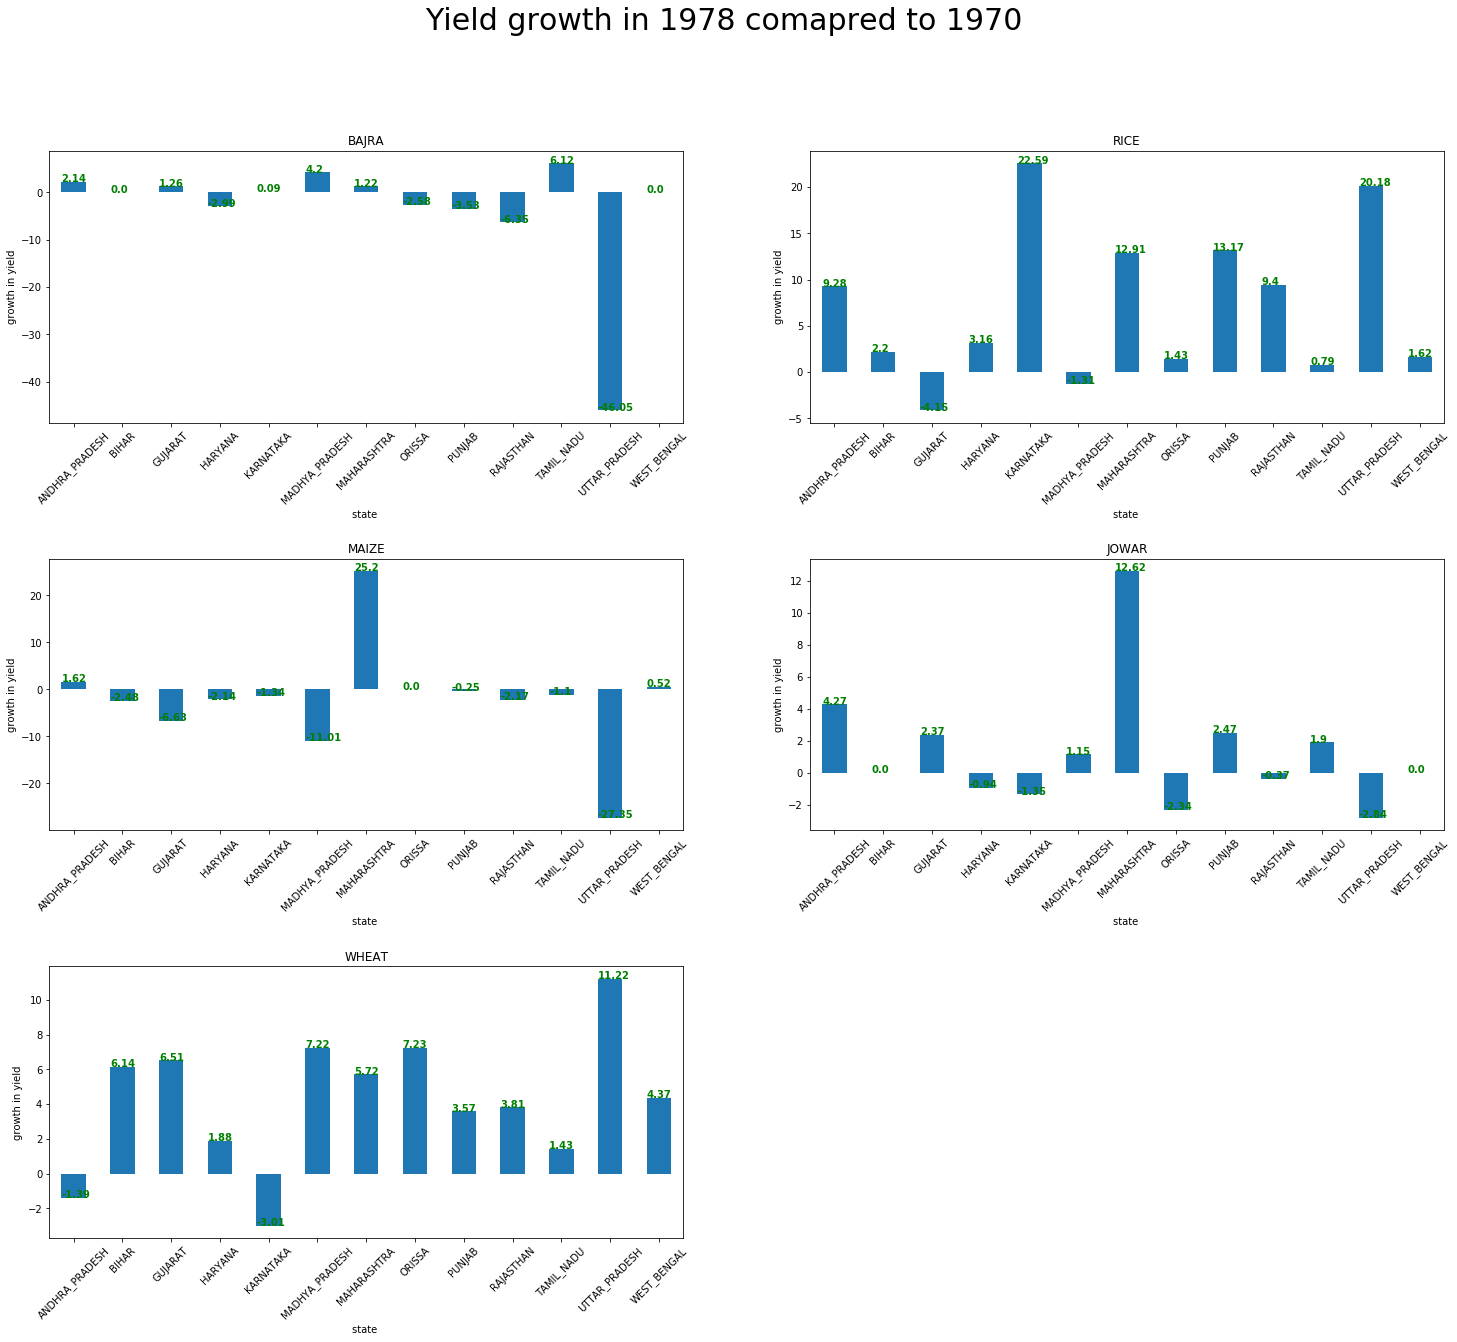

In [240]:
fig,ax = plt.subplots(3,2,figsize=(25,20),gridspec_kw={'hspace':0.5})
ax[2][1].set_visible(False)
axes = ax.flatten()
for i,name in enumerate(crops):
    if(i<=4):
        yield_growth_state_wise_1978[name].plot.bar(ax=axes[i])
        axes[i].set_xlabel('state ')
        axes[i].set_title(name[1:])
        axes[i].set_xticklabels(rotation=45,labels=yield_growth_state_wise_1978.index)
        axes[i].set_ylabel("growth in yield")
        for j,v in enumerate(list(yield_growth_state_wise_1978[name].values)):
            v  =round(v,2)
            axes[i].text(j-.25, 
                  list(yield_growth_state_wise_1978[name].values)[j], str(v), color='green', fontweight='bold')
plt.suptitle("Yield growth in 1978 comapred to 1970", fontsize=30)
plt.savefig('statewise_yield1978.png')

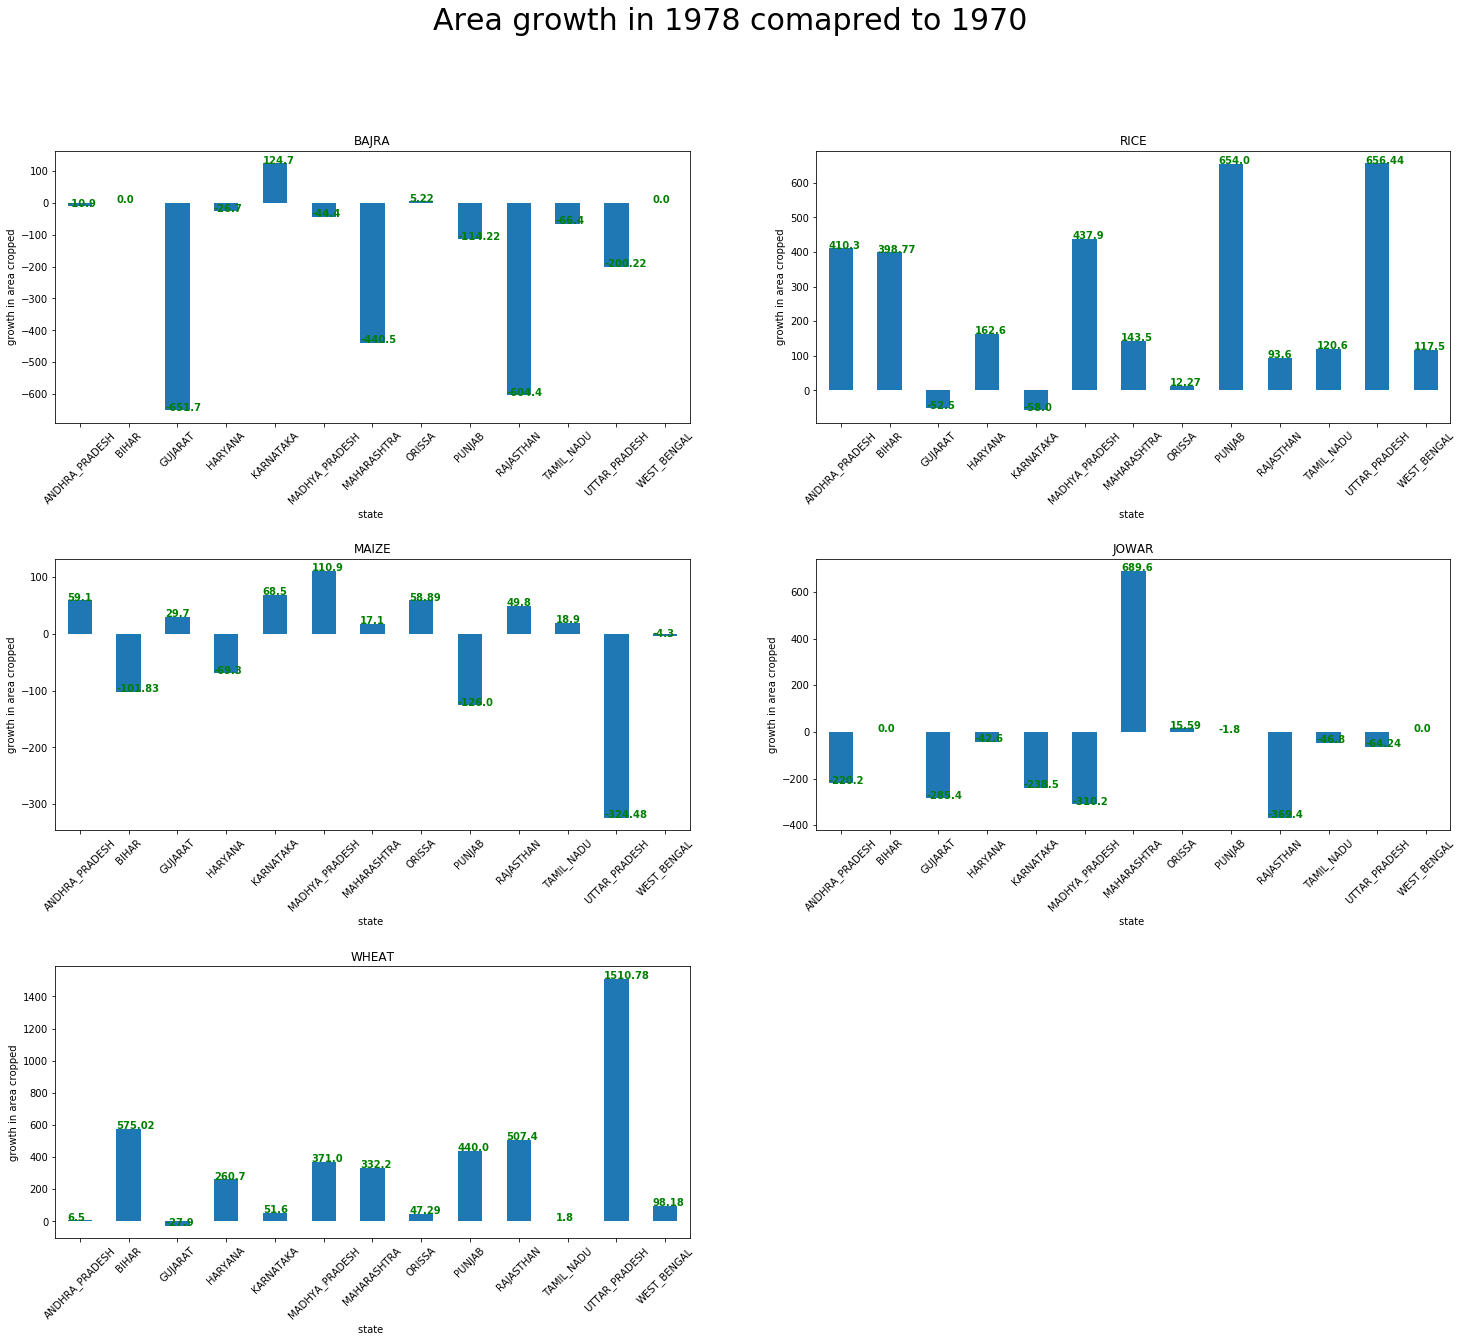

In [241]:
fig,ax = plt.subplots(3,2,figsize=(25,20),gridspec_kw={'hspace':0.5})
ax[2][1].set_visible(False)
axes = ax.flatten()
for i,name in enumerate(crops_area):
    if(i<=4):
        area_growth_state_wise_1978[name].plot.bar(ax=axes[i])
        axes[i].set_xlabel('state ')
        axes[i].set_title(name[1:])
        axes[i].set_xticklabels(rotation=45,labels=area_growth_state_wise_1978.index)
        axes[i].set_ylabel("growth in area cropped")
        for j,v in enumerate(list(area_growth_state_wise_1978[name].values)):
            v  =round(v,2)
            axes[i].text(j-.25, 
                  list(area_growth_state_wise_1978[name].values)[j], str(v), color='green', fontweight='bold')
plt.suptitle("Area growth in 1978 comapred to 1970", fontsize=30)
plt.savefig('statewise_area1978.png')

### 1987

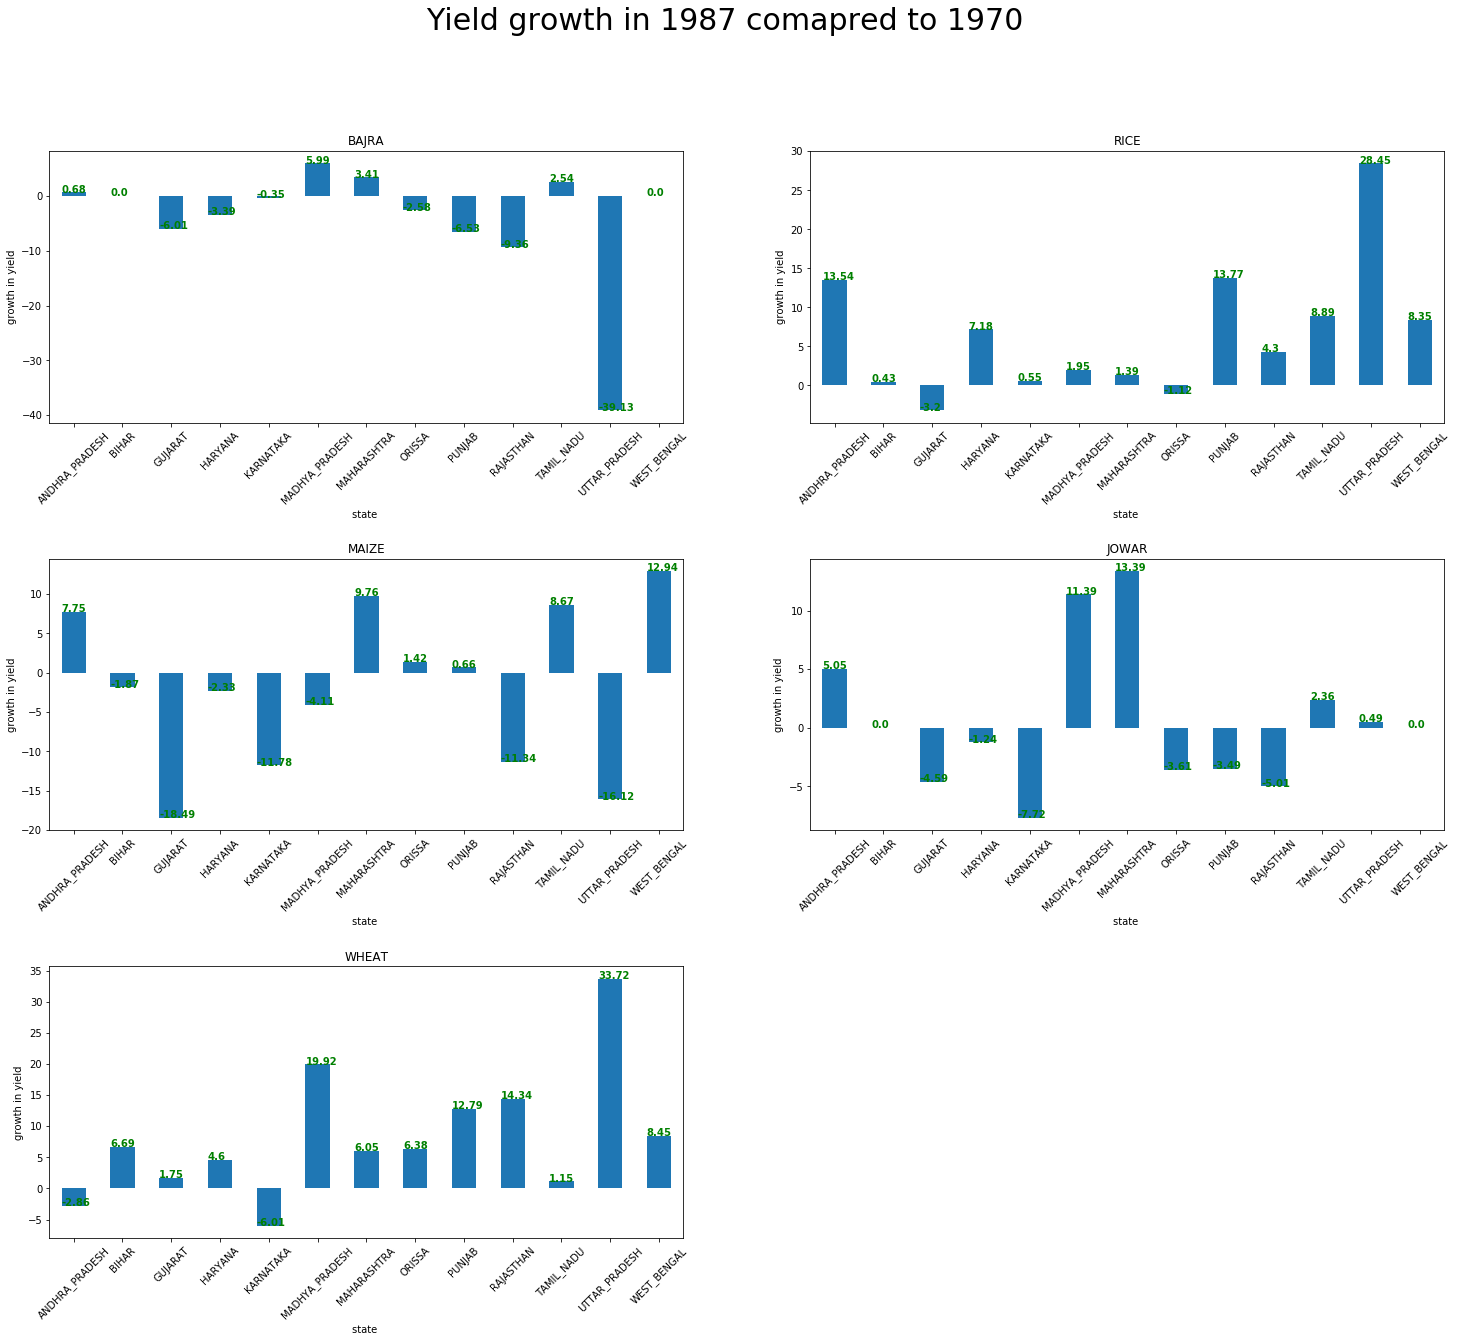

In [242]:
fig,ax = plt.subplots(3,2,figsize=(25,20),gridspec_kw={'hspace':0.5})
ax[2][1].set_visible(False)
axes = ax.flatten()
for i,name in enumerate(crops):
    if(i<=4):
        yield_growth_state_wise_1987[name].plot.bar(ax=axes[i])
        axes[i].set_xlabel('state ')
        axes[i].set_title(name[1:])
        axes[i].set_xticklabels(rotation=45,labels=yield_growth_state_wise_1987.index)
        axes[i].set_ylabel("growth in yield")
        for j,v in enumerate(list(yield_growth_state_wise_1987[name].values)):
            v  =round(v,2)
            axes[i].text(j-.25, 
                  list(yield_growth_state_wise_1987[name].values)[j], str(v), color='green', fontweight='bold')
plt.suptitle("Yield growth in 1987 comapred to 1970", fontsize=30)
plt.savefig('statewise_yield1987.png')

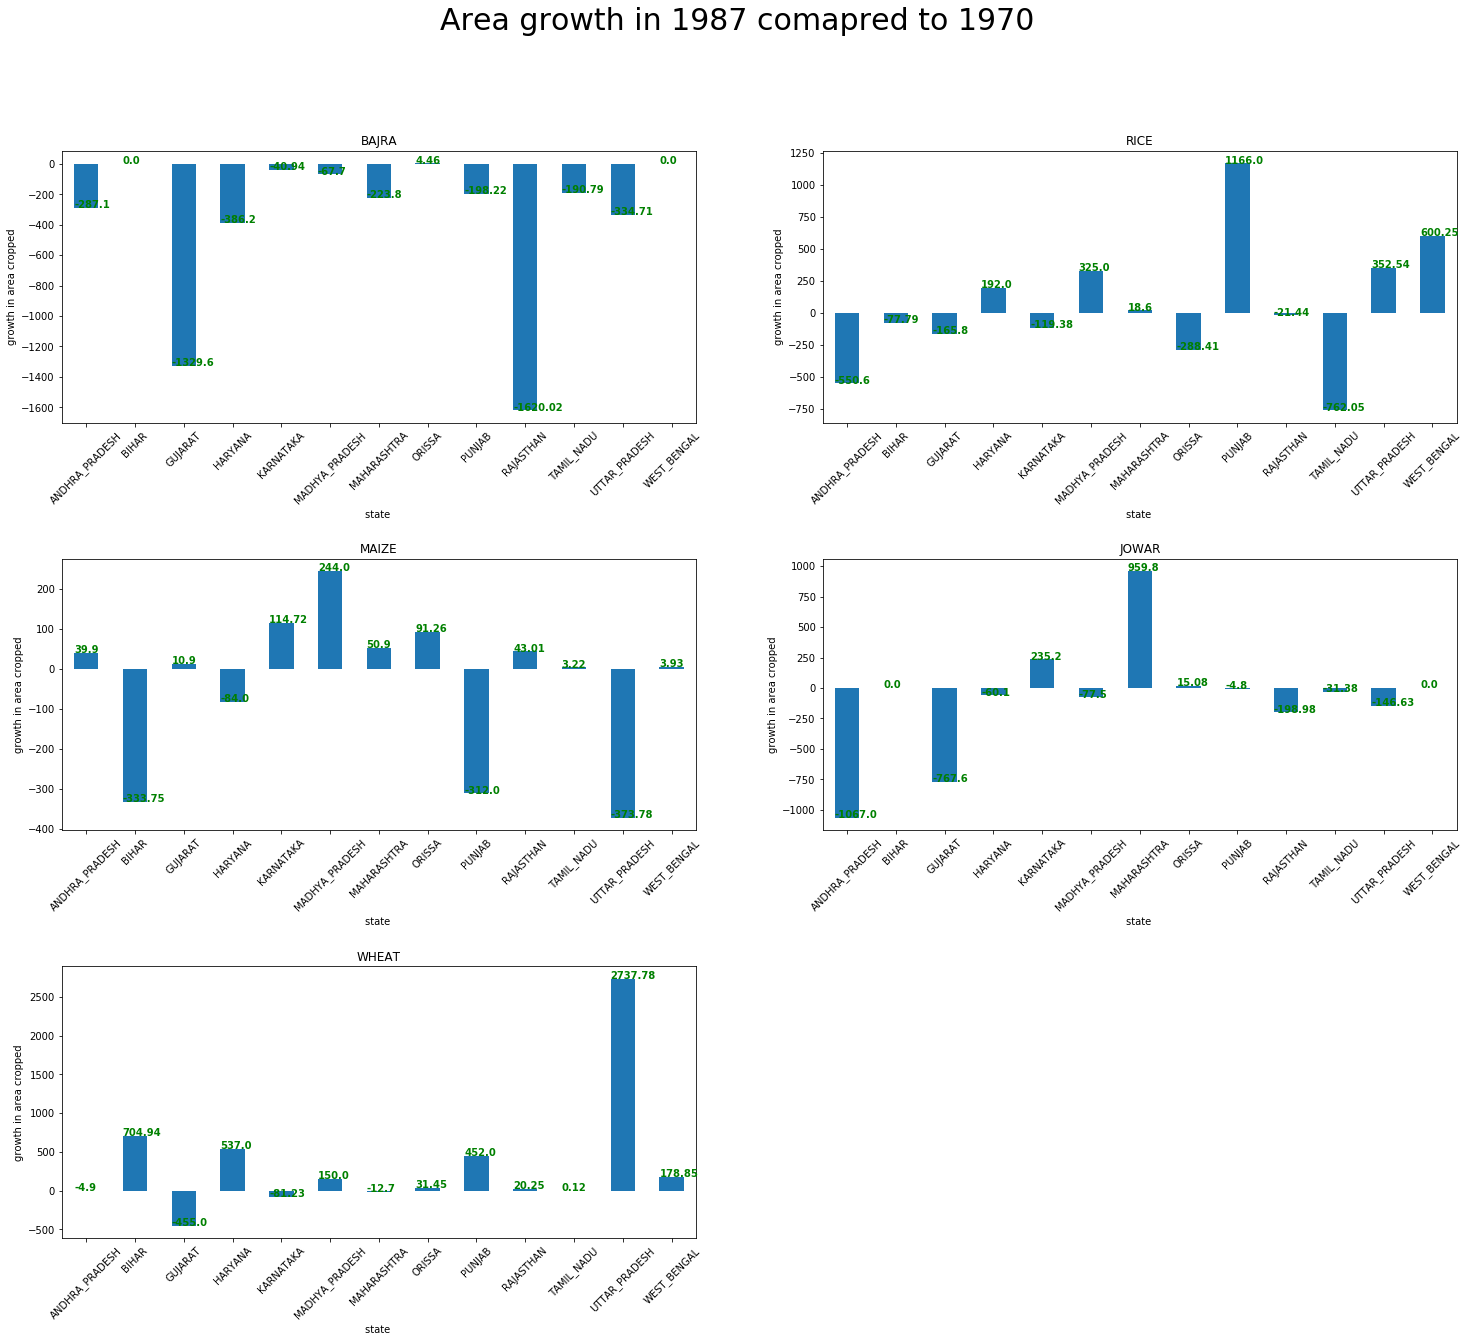

In [243]:
fig,ax = plt.subplots(3,2,figsize=(25,20),gridspec_kw={'hspace':0.5})
ax[2][1].set_visible(False)
axes = ax.flatten()
for i,name in enumerate(crops_area):
    if(i<=4):
        area_growth_state_wise_1987[name].plot.bar(ax=axes[i])
        axes[i].set_xlabel('state ')
        axes[i].set_title(name[1:])
        axes[i].set_xticklabels(rotation=45,labels=area_growth_state_wise_1978.index)
        axes[i].set_ylabel("growth in area cropped")
        for j,v in enumerate(list(area_growth_state_wise_1987[name].values)):
            v  =round(v,2)
            axes[i].text(j-.25, 
                  list(area_growth_state_wise_1987[name].values)[j], str(v), color='green', fontweight='bold')
plt.suptitle("Area growth in 1987 comapred to 1970", fontsize=30)
plt.savefig('statewise_area1987.png')

<Figure size 720x720 with 0 Axes>

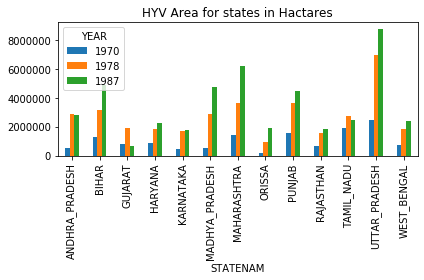

In [37]:
plt.figure(figsize=(10,10))
all_data.groupby(['STATENAM','YEAR']).sum()['AHYV'].unstack().plot(kind='bar')
plt.title("HYV Area for states in Hactares")
plt.savefig("AHVY portion for states.png")

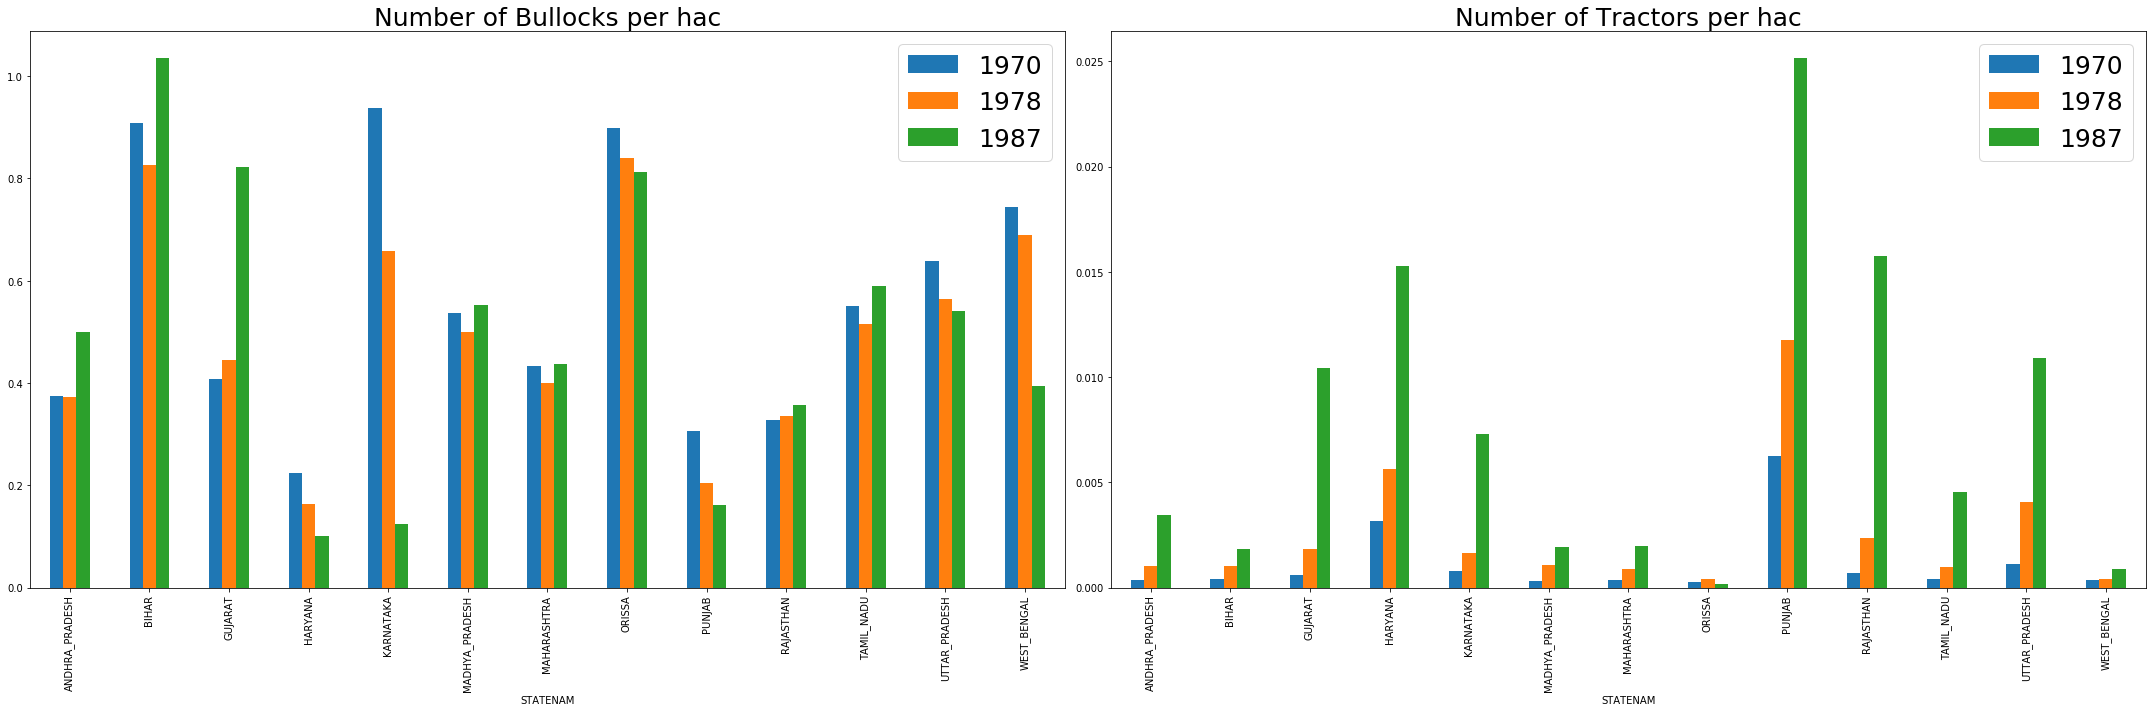

In [33]:
fig,ax = plt.subplots(1,2,figsize=(30,10))
all_data.groupby(['STATENAM','YEAR']).mean()['QBULLHA'].unstack().plot(kind='bar',ax=ax[0])
all_data.groupby(['STATENAM','YEAR']).mean()['QTRACHA'].unstack().plot(kind='bar',ax=ax[1])
ax[0].set_title("Number of Bullocks per hac",fontsize=25)
ax[1].set_title("Number of Tractors per hac",fontsize=25)
ax[0].legend(prop={'size':25})
ax[1].legend(prop={'size':25})
plt.savefig("Input_variables_comparision.png")

<Figure size 3600x3600 with 0 Axes>

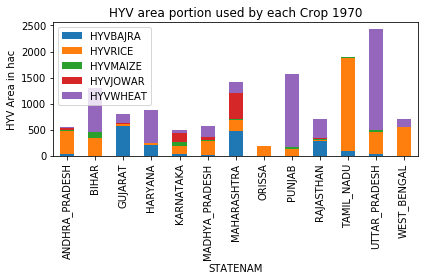

In [69]:
plt.figure(figsize=(50,50))
temp_data =  data_1970.groupby(['STATENAM']).sum()[crops_hyvarea]
temp_data.plot.bar(stacked=True)
plt.title('HYV area portion used by each Crop 1970')
plt.ylabel('HYV Area in hac')
plt.savefig("HYV_PORTION_USED_1970.png")

<Figure size 3600x3600 with 0 Axes>

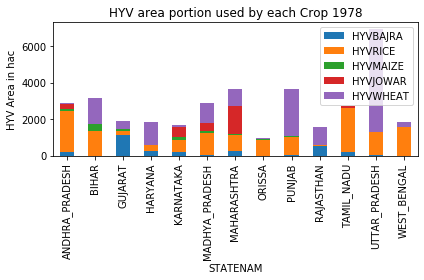

In [70]:
plt.figure(figsize=(50,50))
temp_data =  data_1978.groupby(['STATENAM']).sum()[crops_hyvarea]
temp_data.plot.bar(stacked=True)
plt.title('HYV area portion used by each Crop 1978')
plt.ylabel('HYV Area in hac')
plt.savefig("HYV_PORTION_USED_1978.png")

<Figure size 3600x3600 with 0 Axes>

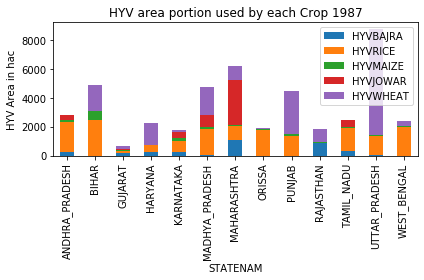

In [71]:
plt.figure(figsize=(50,50))
temp_data =  data_1987.groupby(['STATENAM']).sum()[crops_hyvarea]
temp_data.plot.bar(stacked=True)
plt.title('HYV area portion used by each Crop 1987')
plt.ylabel('HYV Area in hac')
plt.savefig("HYV_PORTION_USED_1987.png")

Text(0.5, 1.0, 'HYV Area for states')

<Figure size 720x720 with 0 Axes>

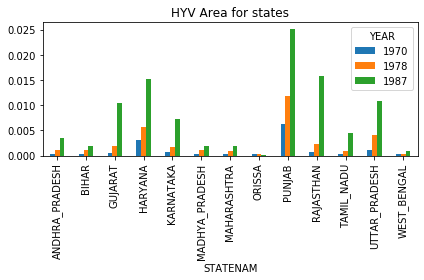

In [19]:
plt.figure(figsize=(10,10))
all_data.groupby(['STATENAM','YEAR']).mean()['QTRACHA'].unstack().plot(kind='bar')
plt.title("HYV Area for states")
# plt.savefig("AHVY portion for states.png")

In [155]:
for name in ['ABAJRA','ARICE','AMAIZE','AJOWAR','AWHEAT']:
        data_1978['growth_of_'+name+'_1970'] = ((data_1978[name]-data_1970[name]))
        data_1987['growth_of_'+name+'_1970'] = ((data_1987[name]-data_1970[name]))

In [144]:
# temp = data_1978.groupby(['STATENAM']).count()['DISTRICT']
# labels =[]
# for name in list(temp.index):
#     print(name)
#     count =0
#     while(count<temp.loc[name]):
#             labels.append(data_1978.iloc[count]['DISTRICT'])
#             count+=1
#             if(count==temp.loc[name]//2):
#                 labels.append("\n"+name)
        

In [145]:
# fig,axes= plt.subplots(2,1,figsize=(100,20))
# ax=axes[0]
# data_1978['growth_of_YBAJRA_1970'].plot.bar(ax=ax)
# xticks = range(271)
# xticks_minor=[]
# for name in list(temp.index):
#     xticks_minor.append(temp.loc[name])
# xlbls = labels

# ax.set_xticks( xticks )
# ax.set_xticks( xticks_minor, minor=True )
# ax.set_xticklabels( xlbls )

# ax.grid( 'off', axis='x' )
# ax.grid( 'off', axis='x', which='minor' )

# # vertical alignment of xtick labels
# ax.tick_params( axis='x', which='minor', direction='out', length=30 )
# ax.tick_params( axis='x', which='major', bottom='off', top='off' )

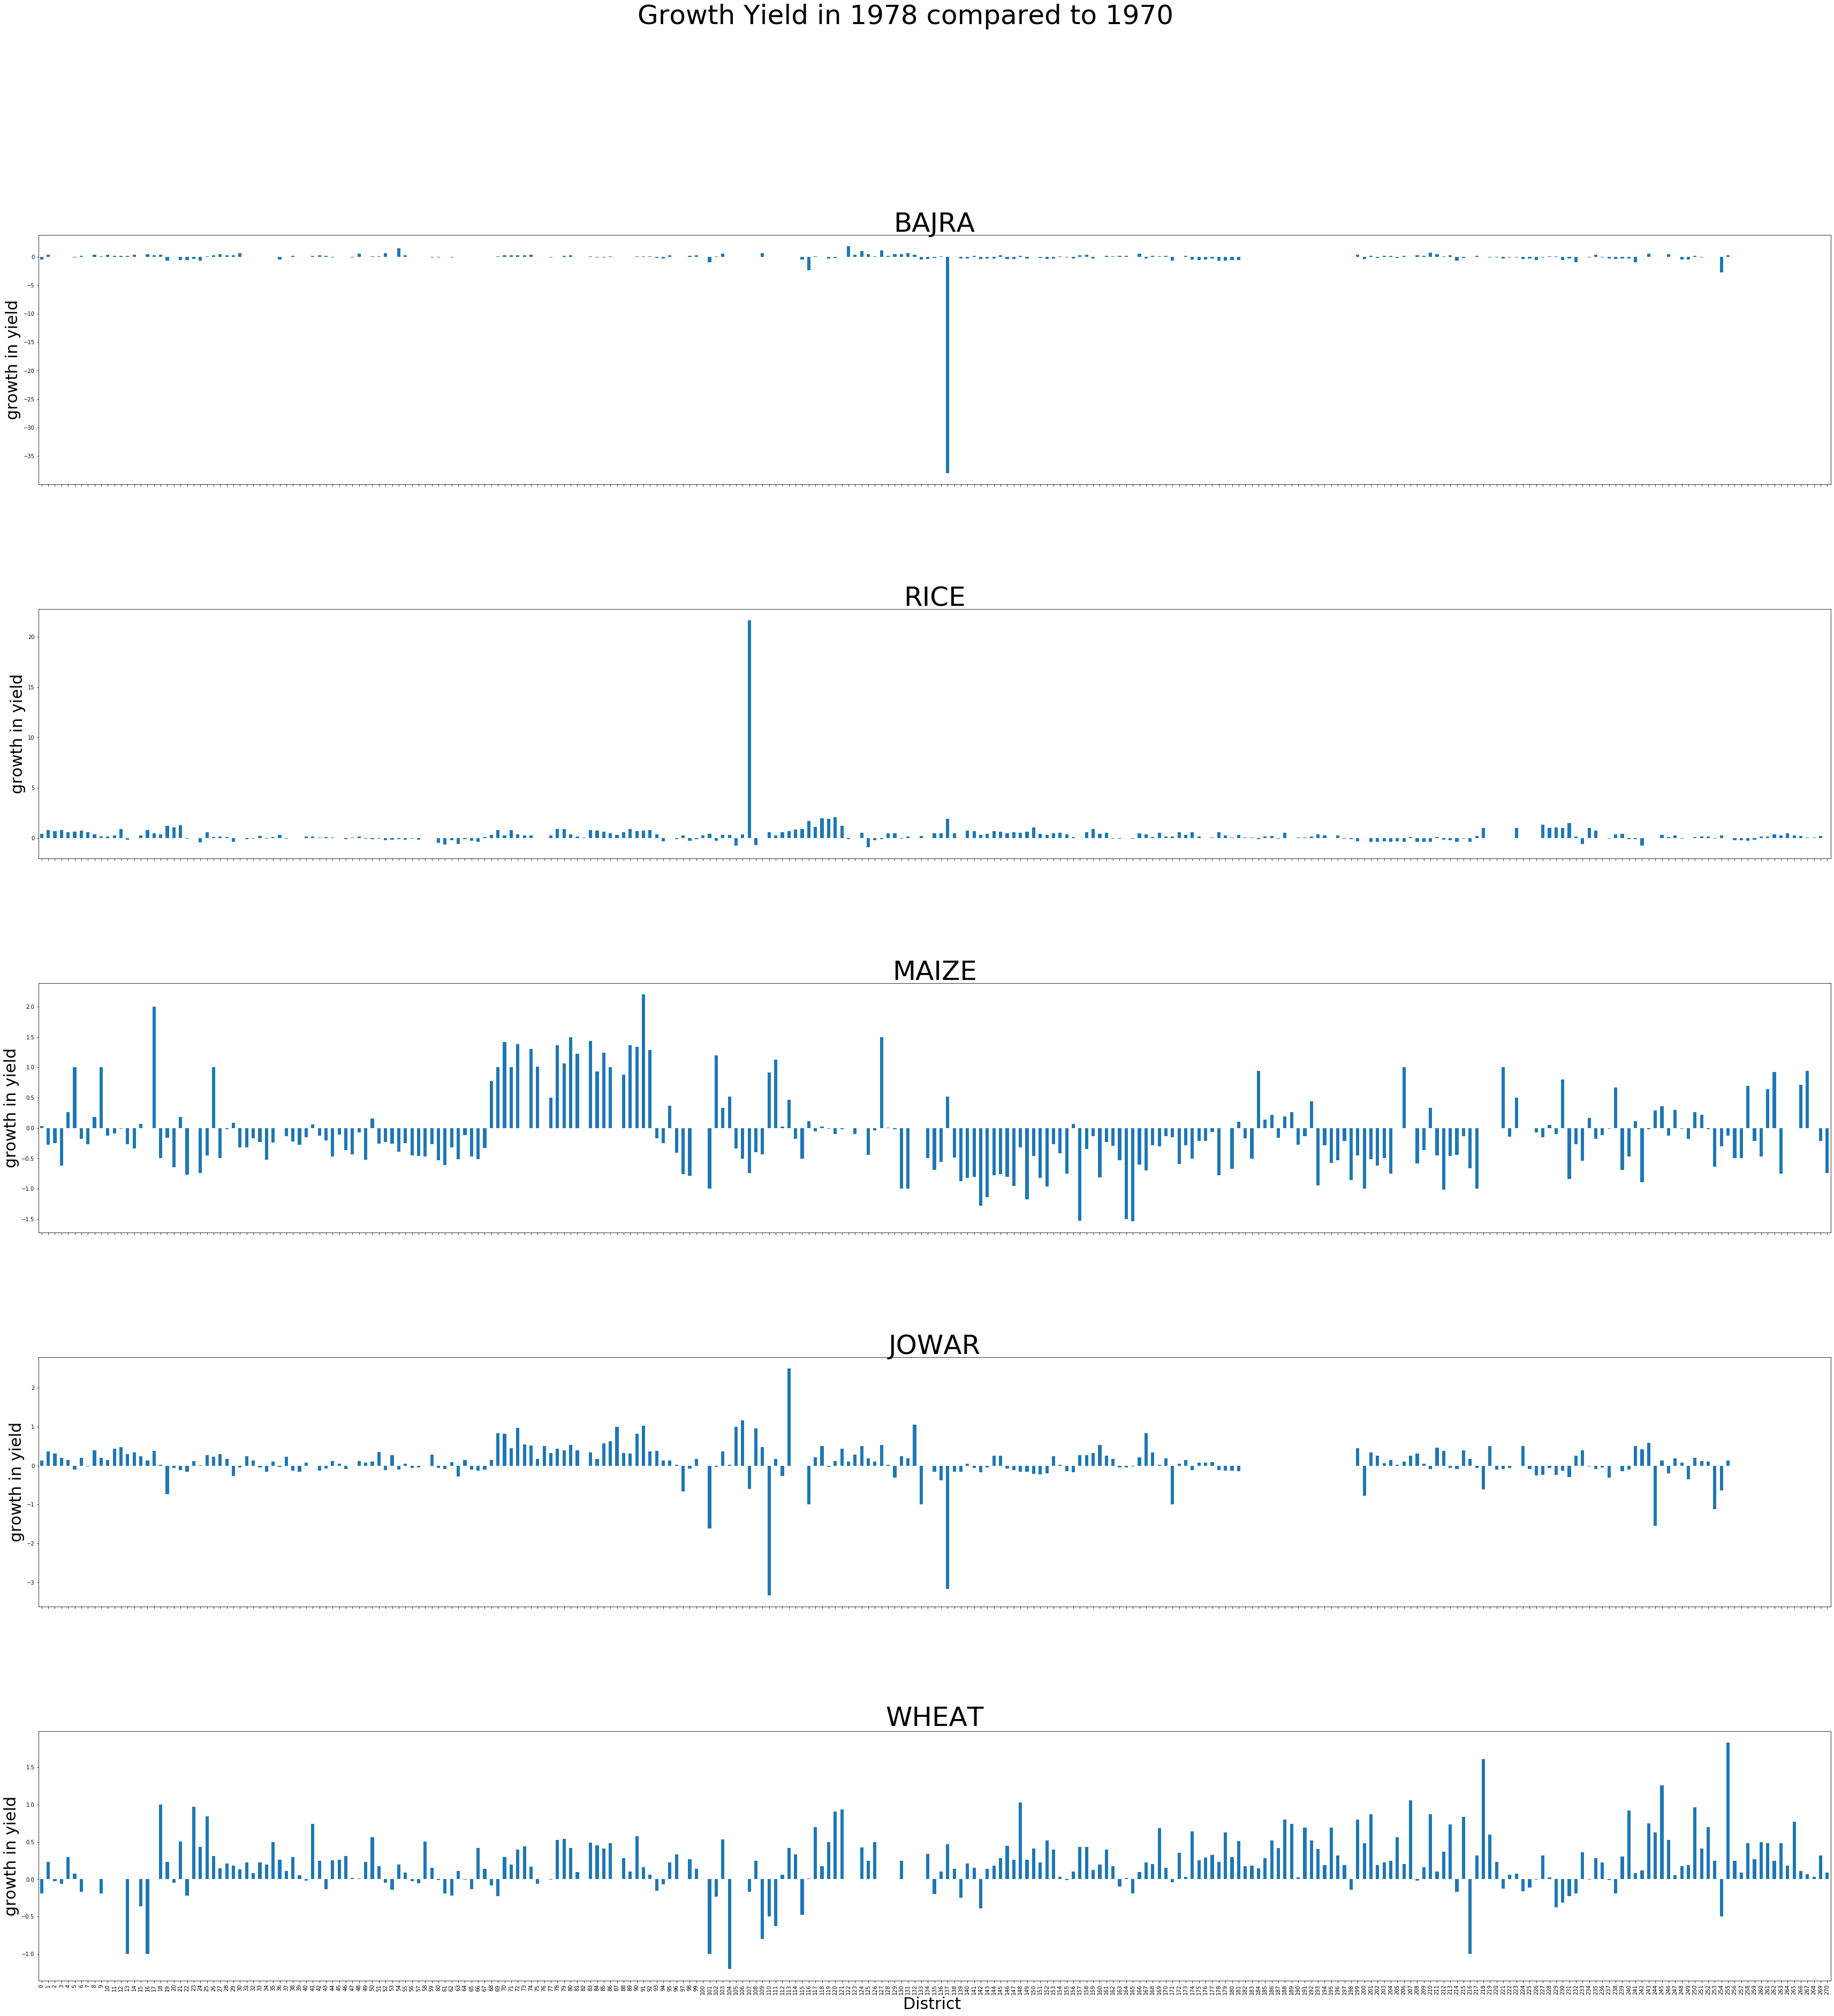

In [245]:
fig,ax = plt.subplots(5,1,figsize=(60,60),gridspec_kw={'hspace': 0.5},sharex=True)
axes= ax.flatten()
for i,name in enumerate(crops):
    data_1978['growth_of_'+name+'_1970'].plot(kind='bar',ax=axes[i])
    axes[i].set_xlabel('District ',fontsize=30)
    axes[i].set_title(name[1:],fontsize=50)
    axes[i].set_ylabel("growth in yield",fontsize=30)
plt.suptitle('Growth Yield in 1978 compared to 1970',fontsize=50)
plt.savefig("yieldGrowth1978.png")
plt.show()

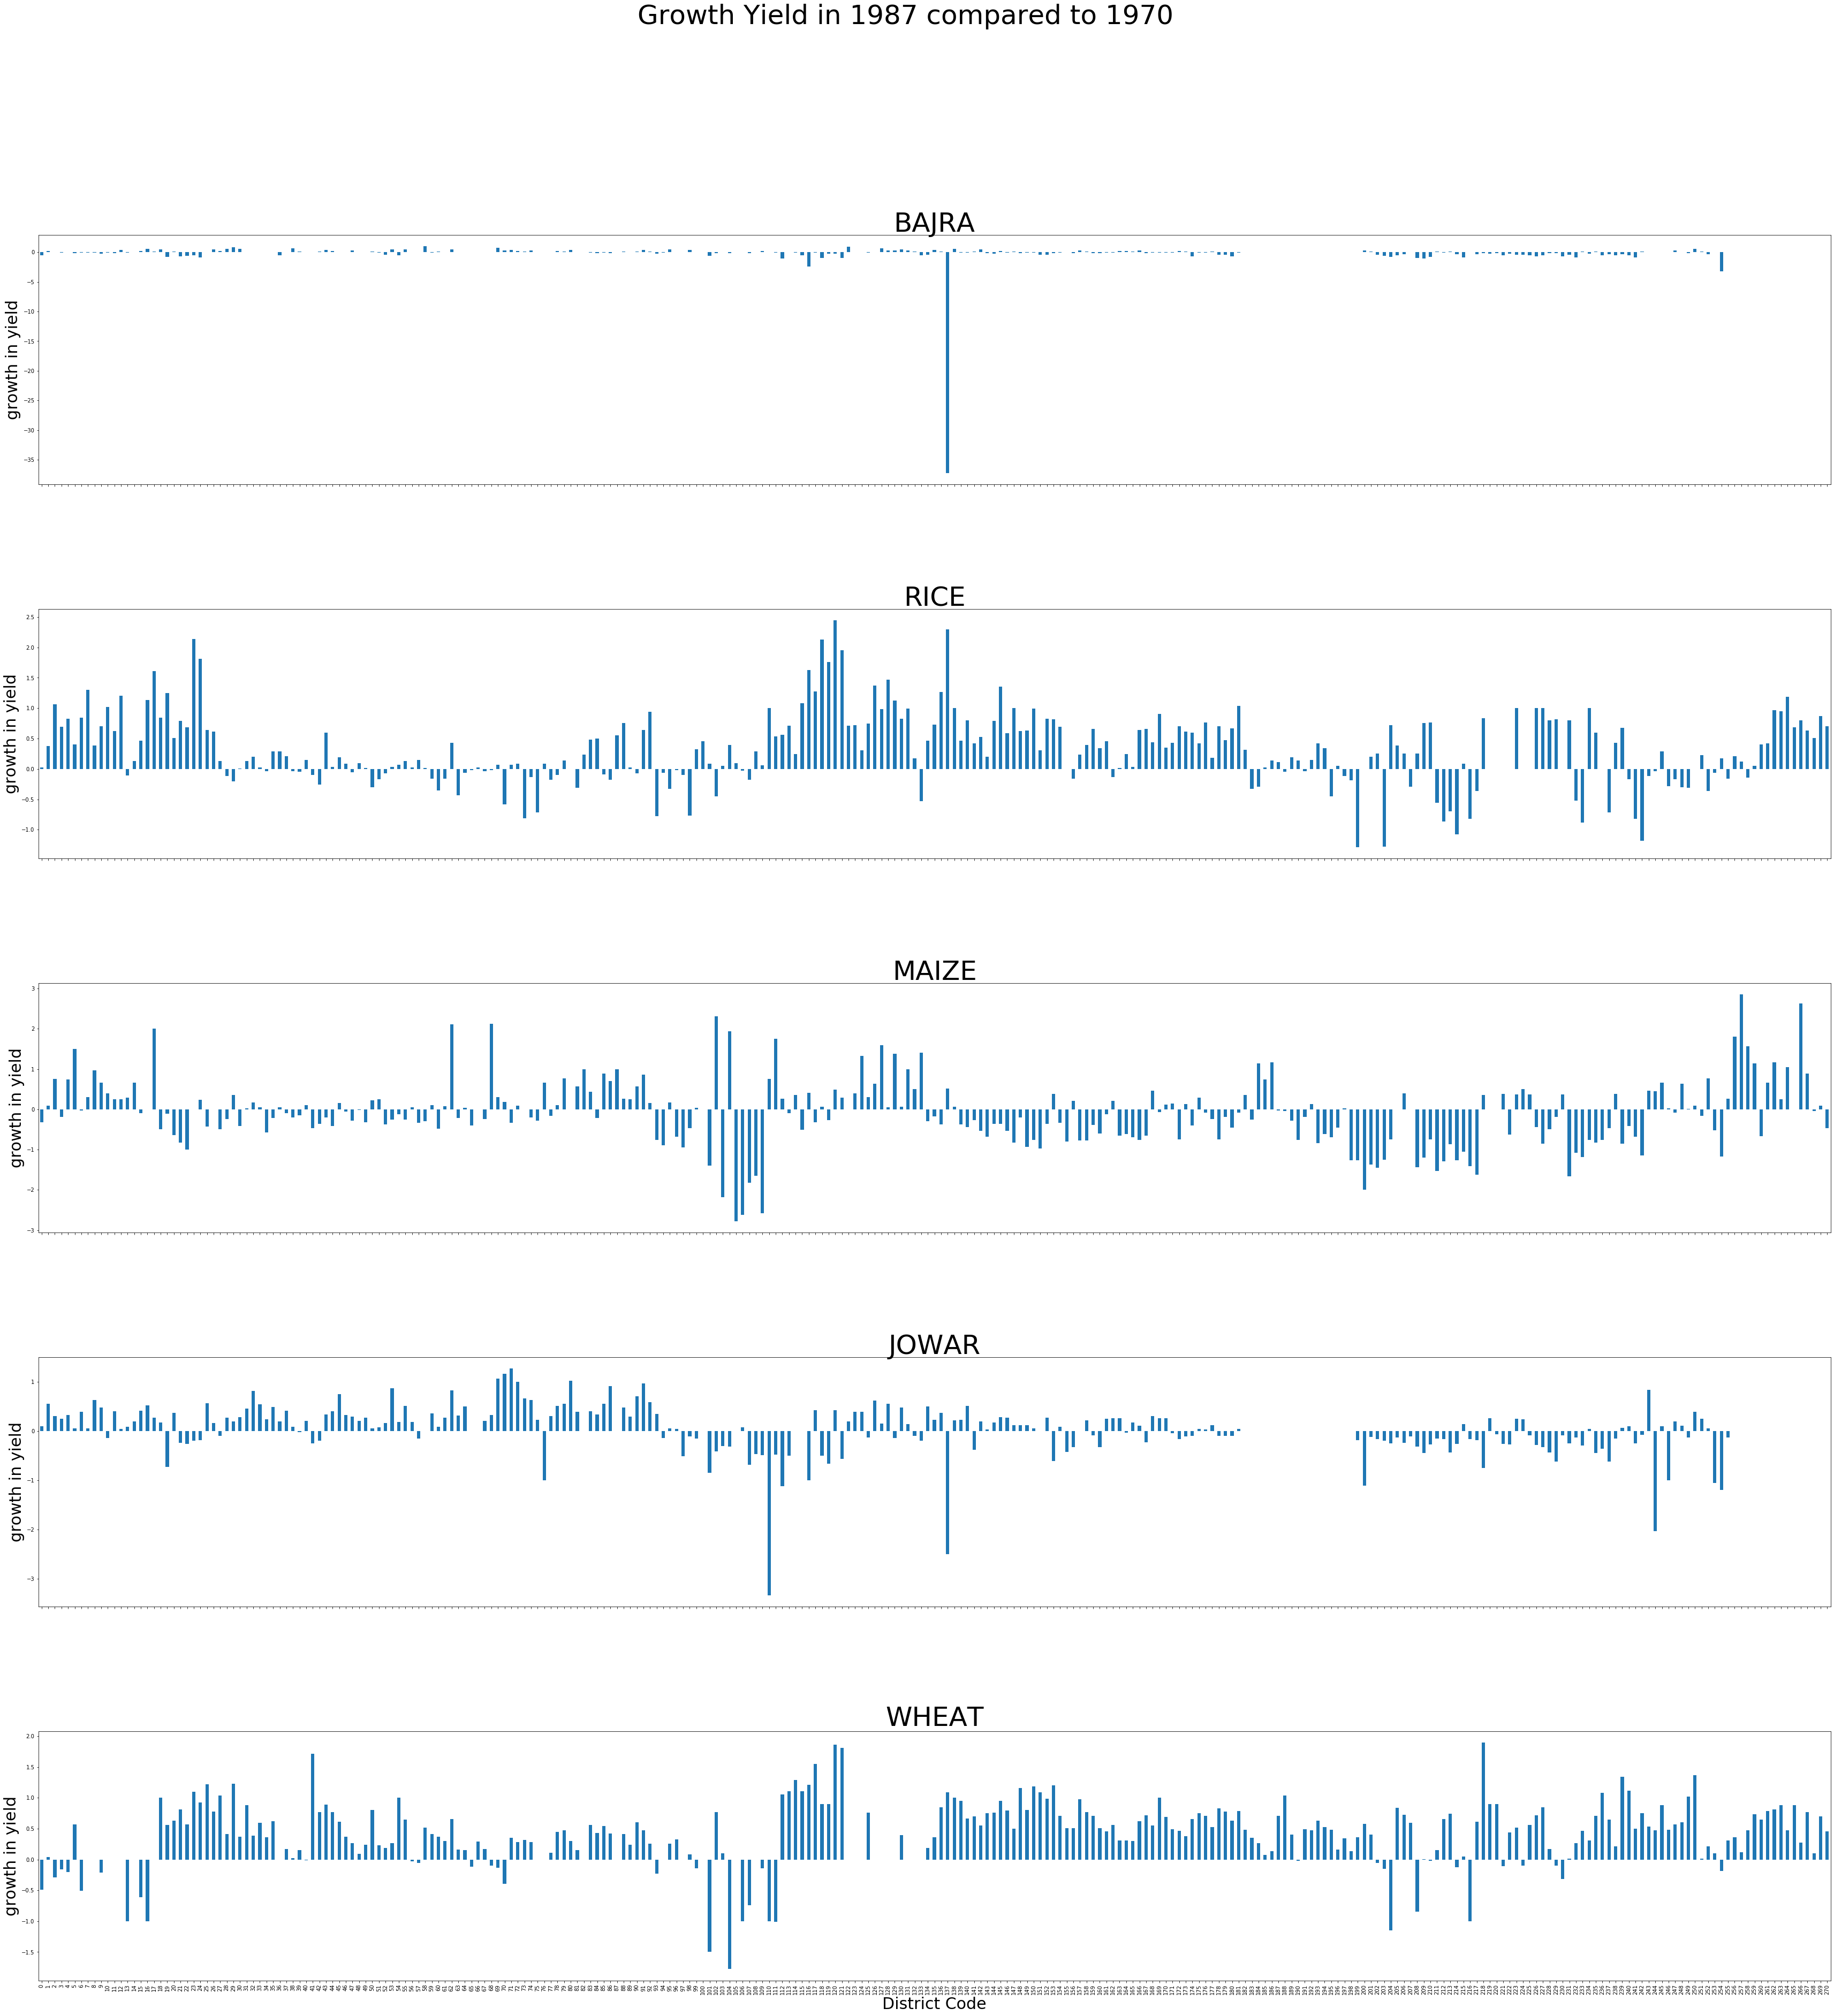

In [246]:
fig,ax = plt.subplots(5,1,figsize=(60,60),gridspec_kw={'hspace': 0.5},sharex=True)
axes= ax.flatten()
for i,name in enumerate(crops):
    data_1987['growth_of_'+name+'_1970'].plot(kind='bar',ax=axes[i])
    axes[i].set_xlabel('District Code',fontsize=30)
    axes[i].set_title(name[1:],fontsize=50)
    axes[i].set_ylabel("growth in yield",fontsize=30)
plt.suptitle('Growth Yield in 1987 compared to 1970',fontsize=50)
plt.savefig("yieldGrowth1987.png")
plt.show()

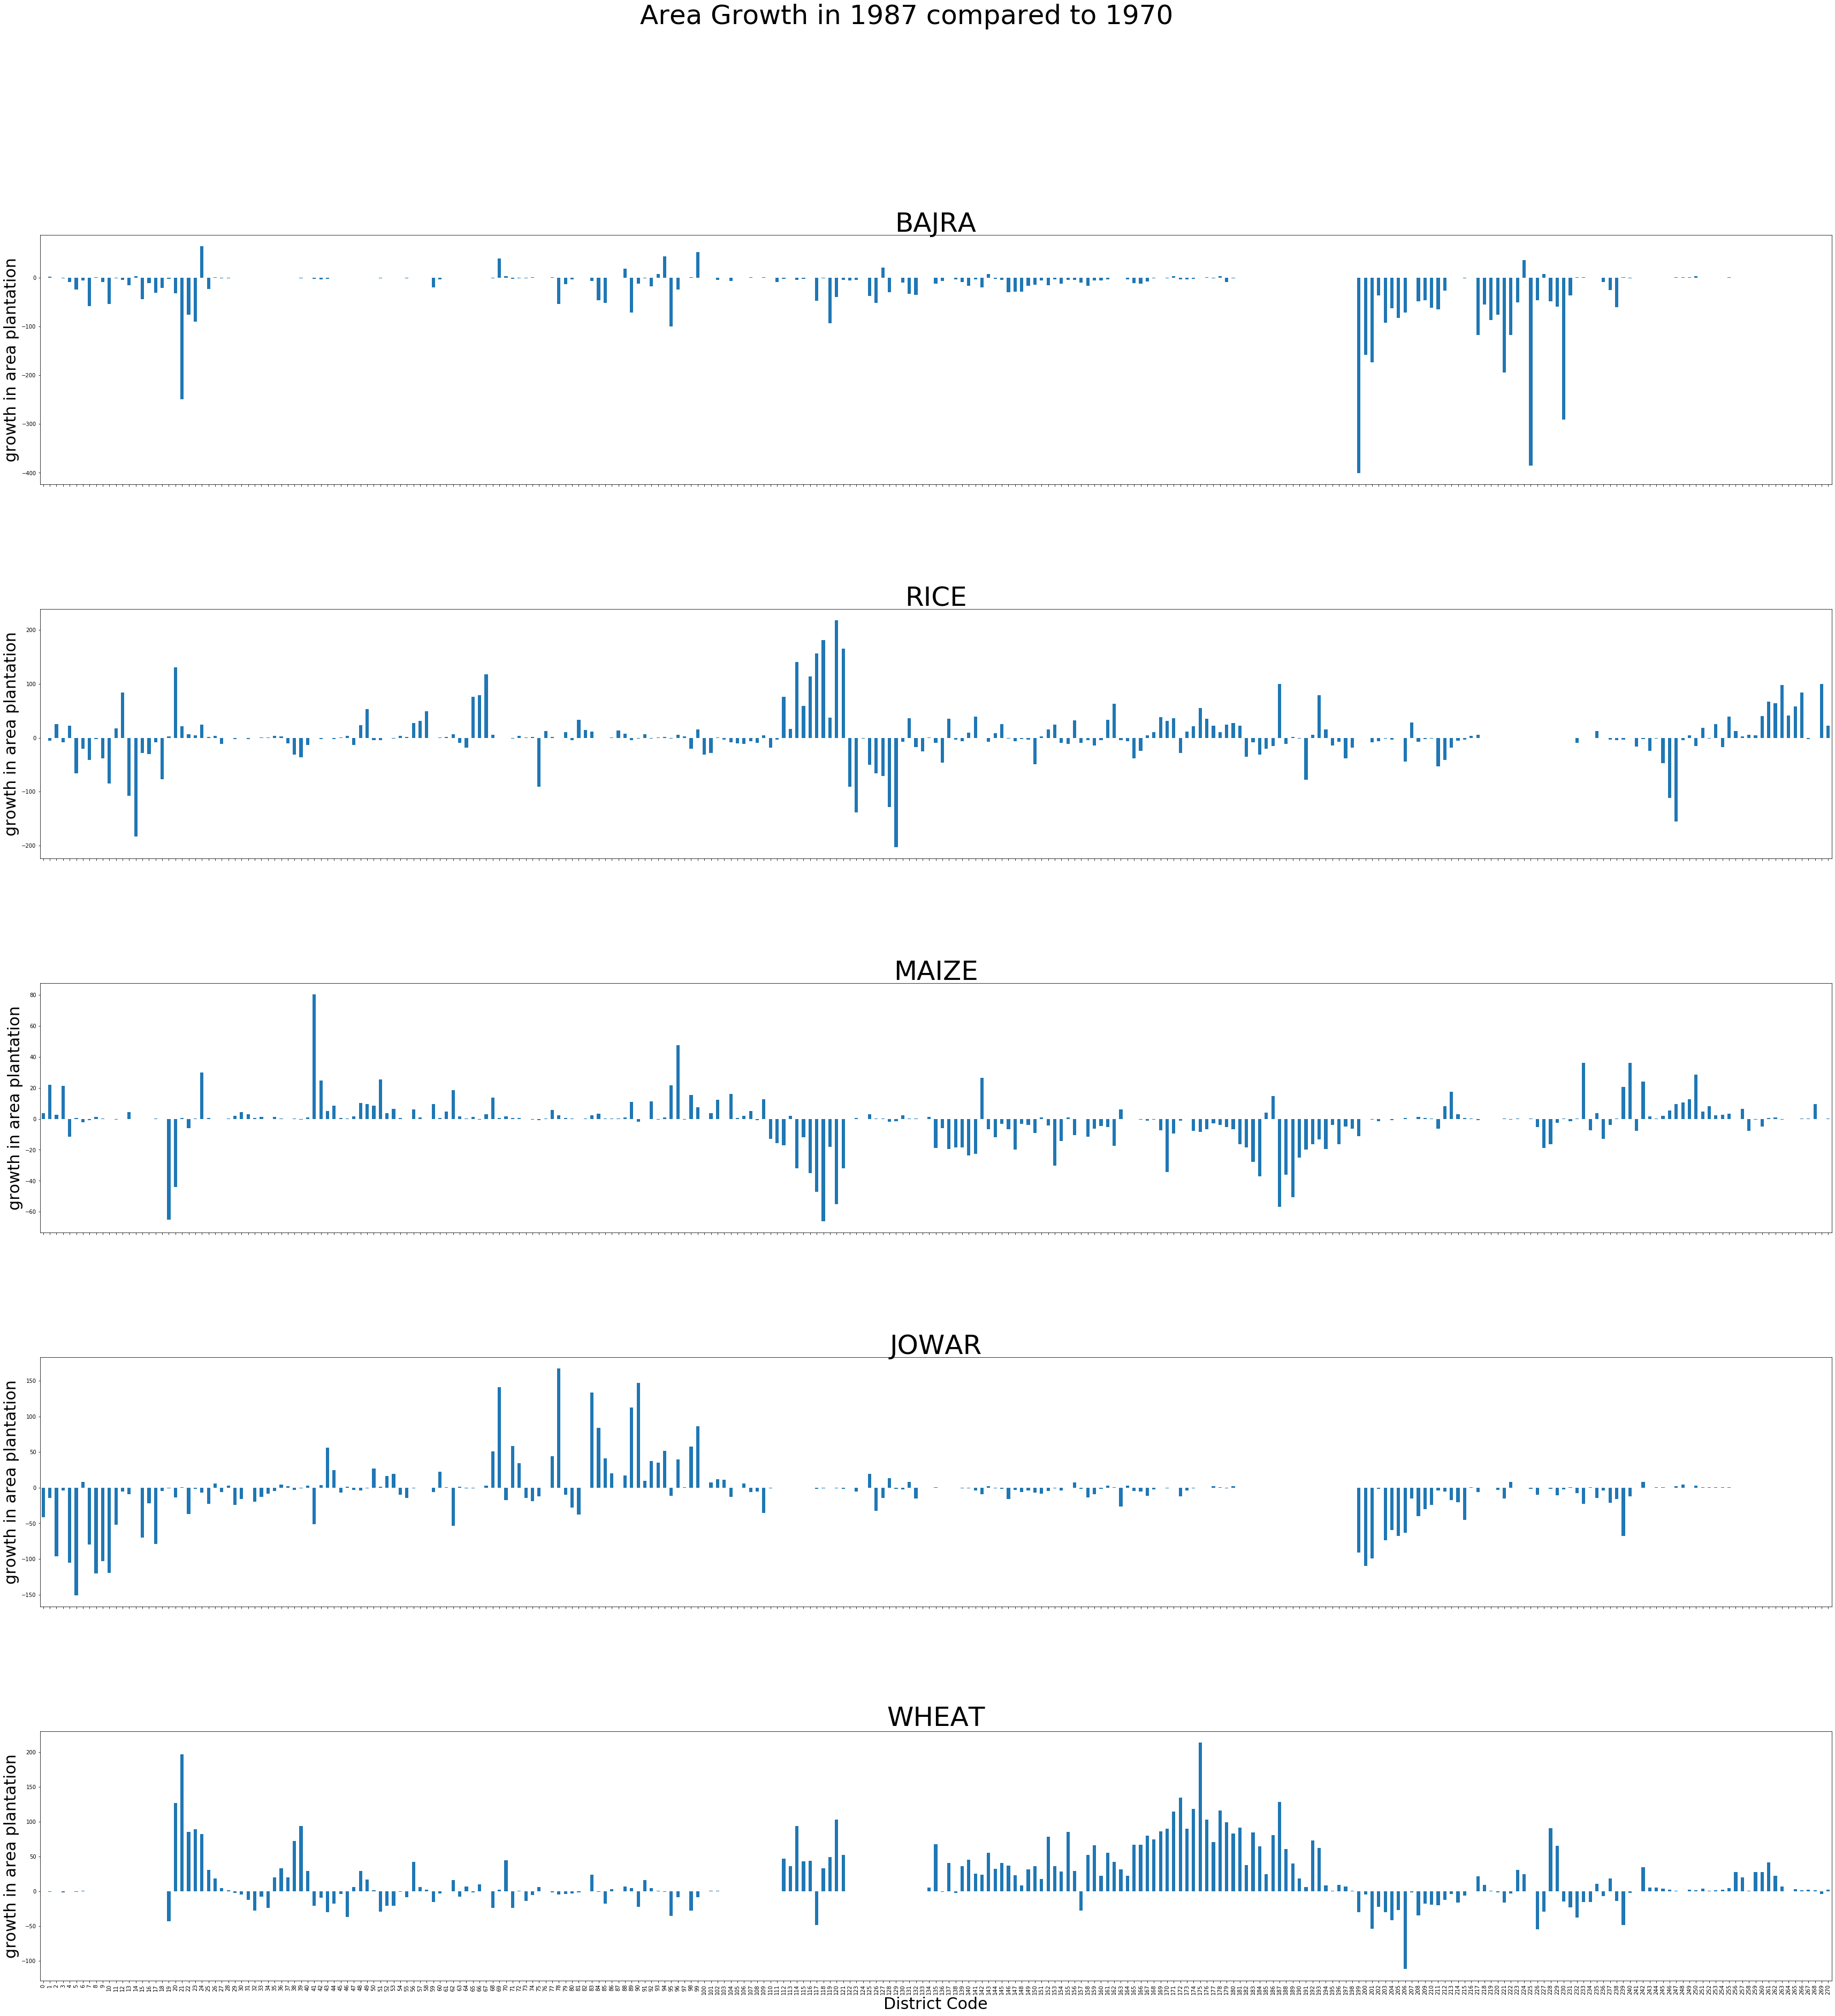

In [247]:
fig,ax = plt.subplots(5,1,figsize=(60,60),gridspec_kw={'hspace': 0.5},sharex=True)
axes= ax.flatten()
for i,name in enumerate(crops_area):
    data_1987['growth_of_'+name+'_1970'].plot(kind='bar',ax=axes[i])
    axes[i].set_xlabel('District Code',fontsize=30)
    axes[i].set_title(name[1:],fontsize=50)
    axes[i].set_ylabel("growth in area plantation",fontsize=30)
plt.suptitle('Area Growth in 1987 compared to 1970',fontsize=50)
plt.savefig("AreaGrowth1987.png")
plt.show()

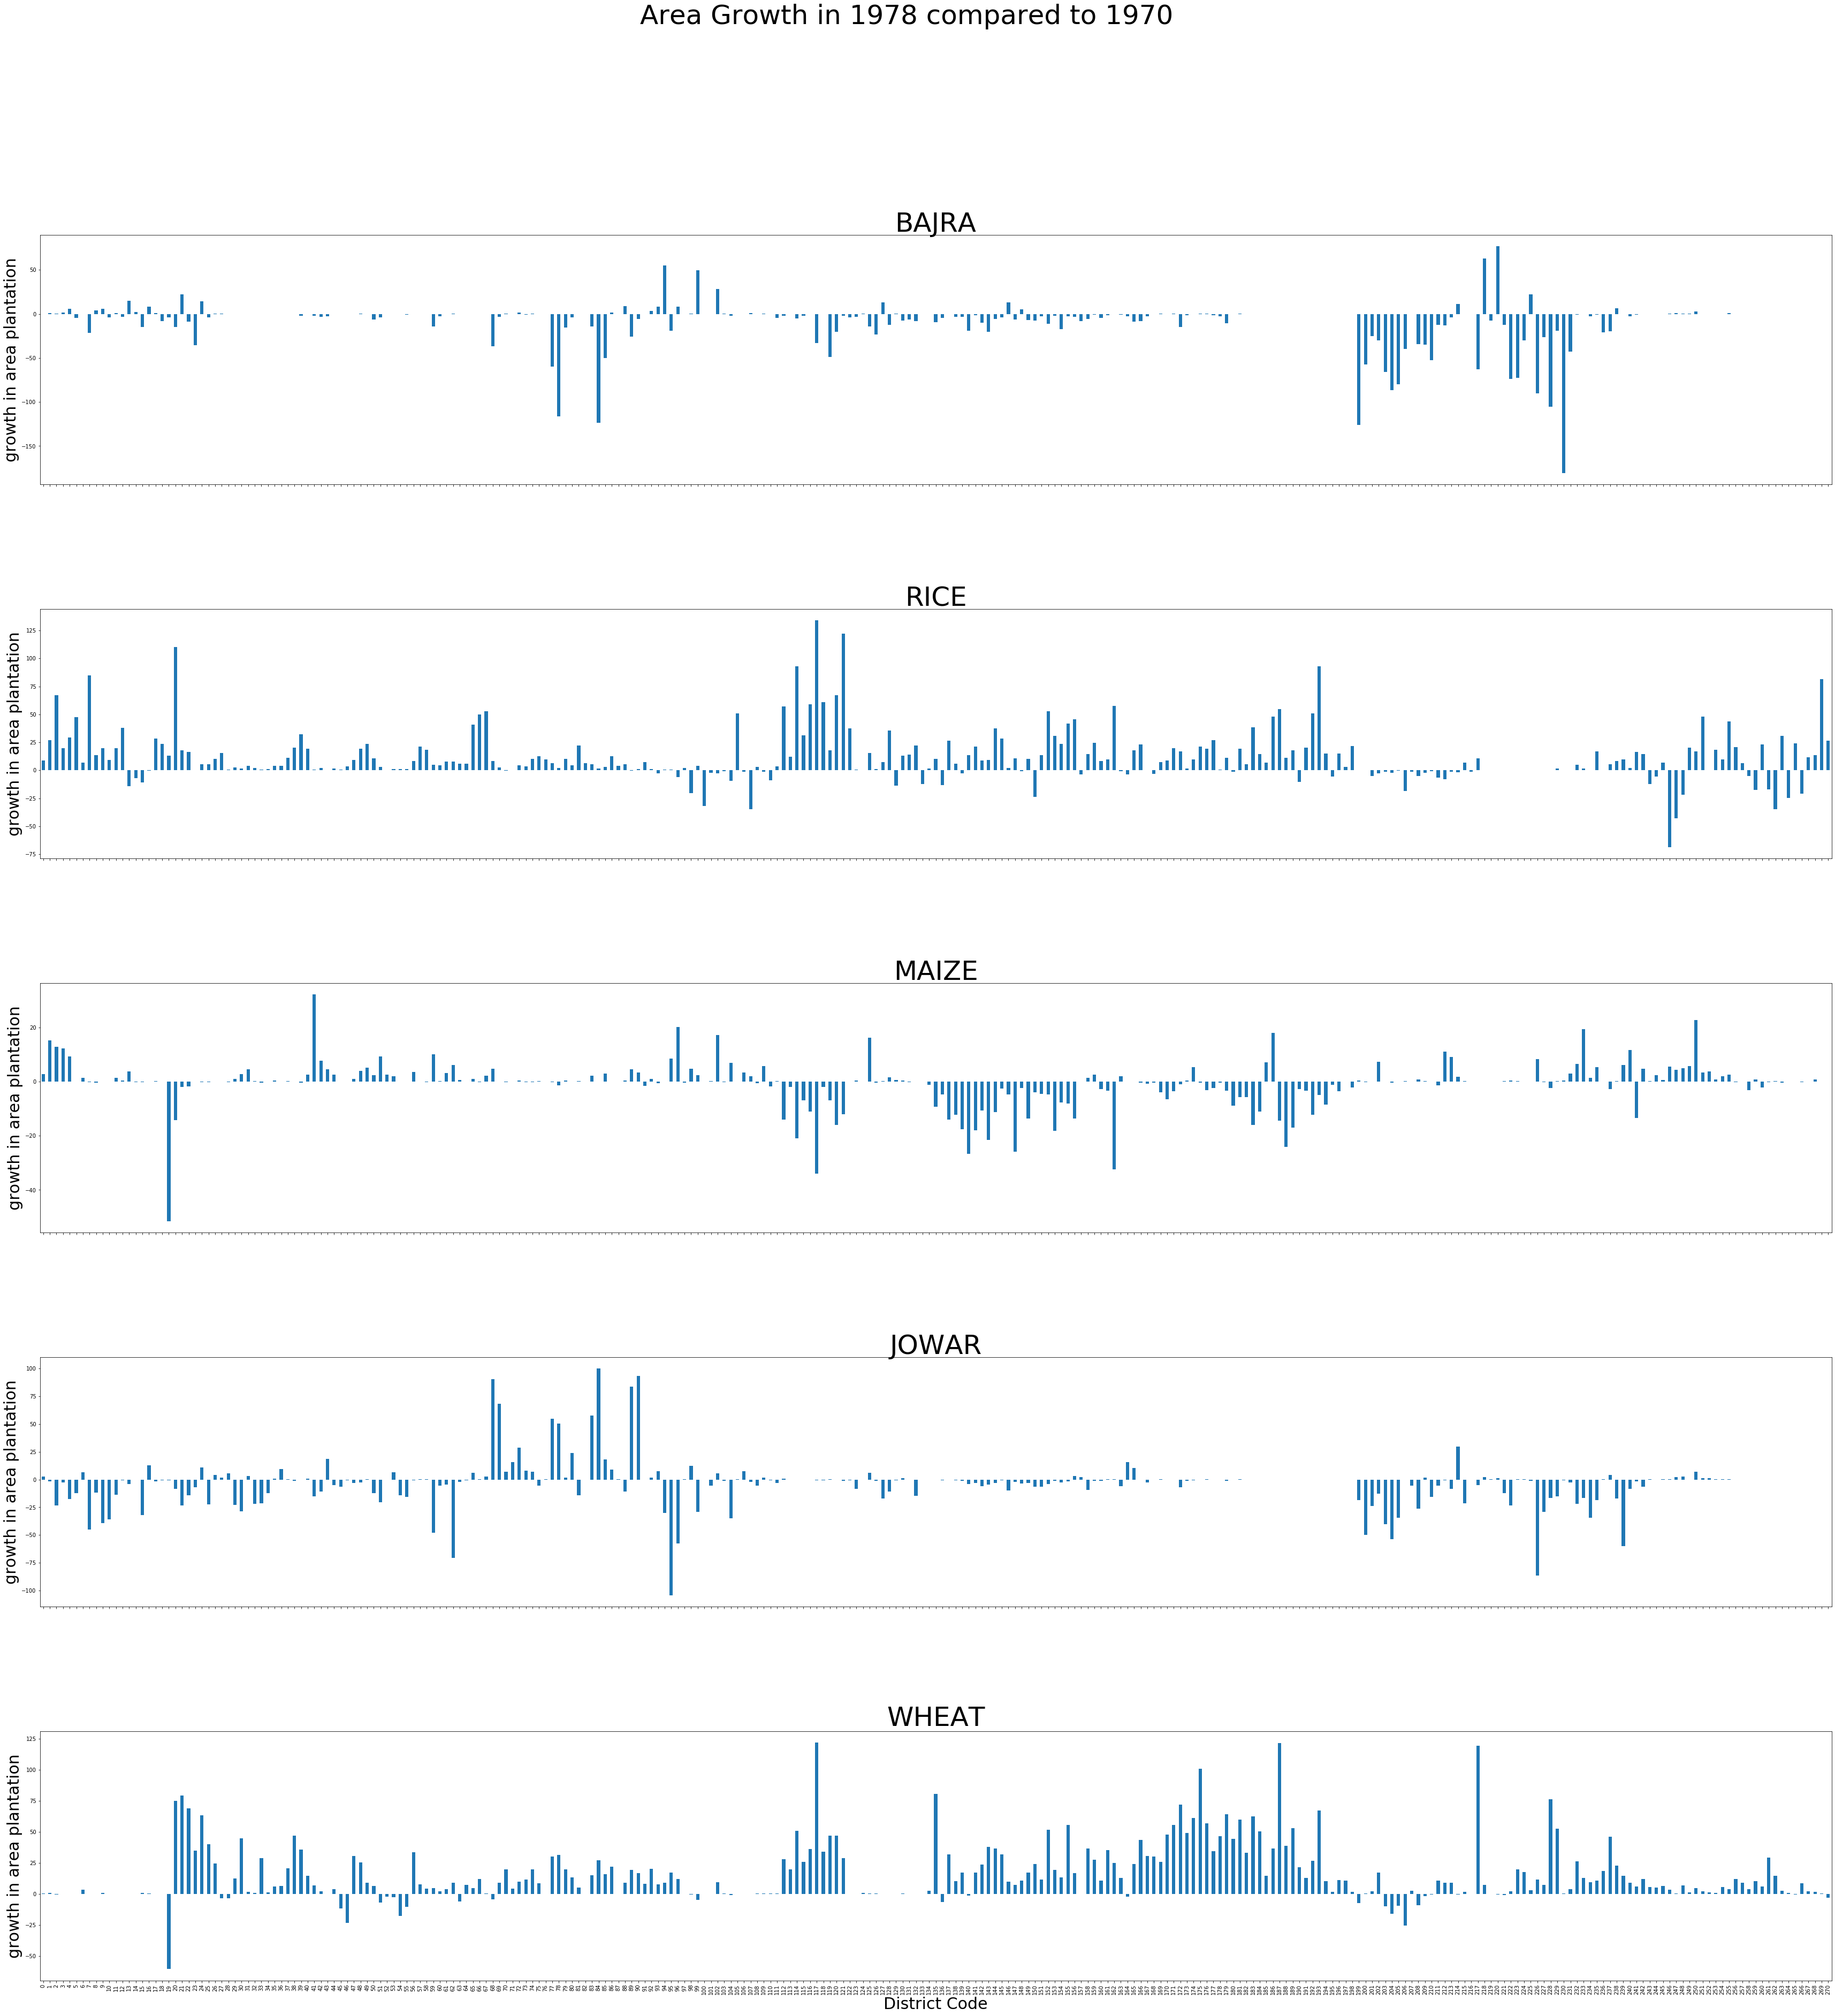

In [248]:
fig,ax = plt.subplots(5,1,figsize=(60,60),gridspec_kw={'hspace': 0.5},sharex=True)
axes= ax.flatten()
for i,name in enumerate(crops_area):
    data_1978['growth_of_'+name+'_1970'].plot(kind='bar',ax=axes[i])
    axes[i].set_xlabel('District Code',fontsize=30)
    axes[i].set_title(name[1:],fontsize=50)
    axes[i].set_ylabel("growth in area plantation",fontsize=30)
plt.suptitle('Area Growth in 1978 compared to 1970',fontsize=50)
plt.savefig("AreaGrowth1978.png")
plt.show()

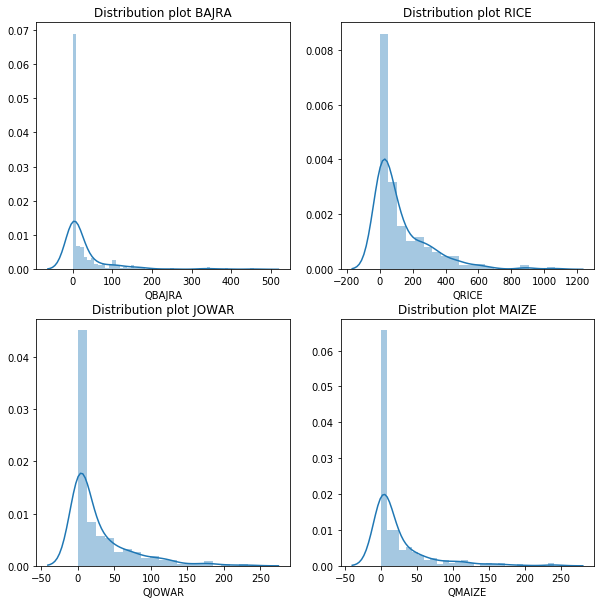

In [11]:
fig,axes = plt.subplots(2,2,figsize=(10,10))
axes=axes.flatten()
# fig = plt.figure(figsize=(10,10))
for i,name in enumerate(['QBAJRA','QRICE','QJOWAR','QMAIZE']):
    sns.distplot(data_1970[name],kde=True,ax=axes[i])
    axes[i].set_title('Distribution plot '+ name[1:])
plt.savefig('distributons.png')

# production

In [12]:
area_state_wise = data_1970.groupby(['STATENAM']).sum()[['YBAJRA','YRICE','YMAIZE','YJOWAR']]
area_state_wise

YBAJRA      YRICE     YMAIZE     YJOWAR
STATENAM                                                  
ANDHRA_PRADESH   9.175747  24.630927  19.882997   7.097367
BIHAR            0.000000  14.814096  19.246106   0.000000
GUJARAT         13.814846  21.227628  23.775276   8.642638
HARYANA          5.423864   7.396161   5.732510   1.996351
KARNATAKA        6.012401  33.714067  49.752981  19.565411
MADHYA_PRADESH  11.590195  29.187780  48.428367  28.891908
MAHARASHTRA      6.402127  22.395587  11.873102   8.172948
ORISSA           7.479810  11.512880  12.131521  11.948214
PUNJAB          11.528661  16.970023  15.284321   5.492024
RAJASTHAN       13.432874  10.128175  20.606116  10.860512
TAMIL_NADU       7.224071  23.725261   8.503117   9.667177
UTTAR_PRADESH   74.957735  36.921303  54.950712  32.955791
WEST_BENGAL      0.000000  15.933810   9.570000   0.000000

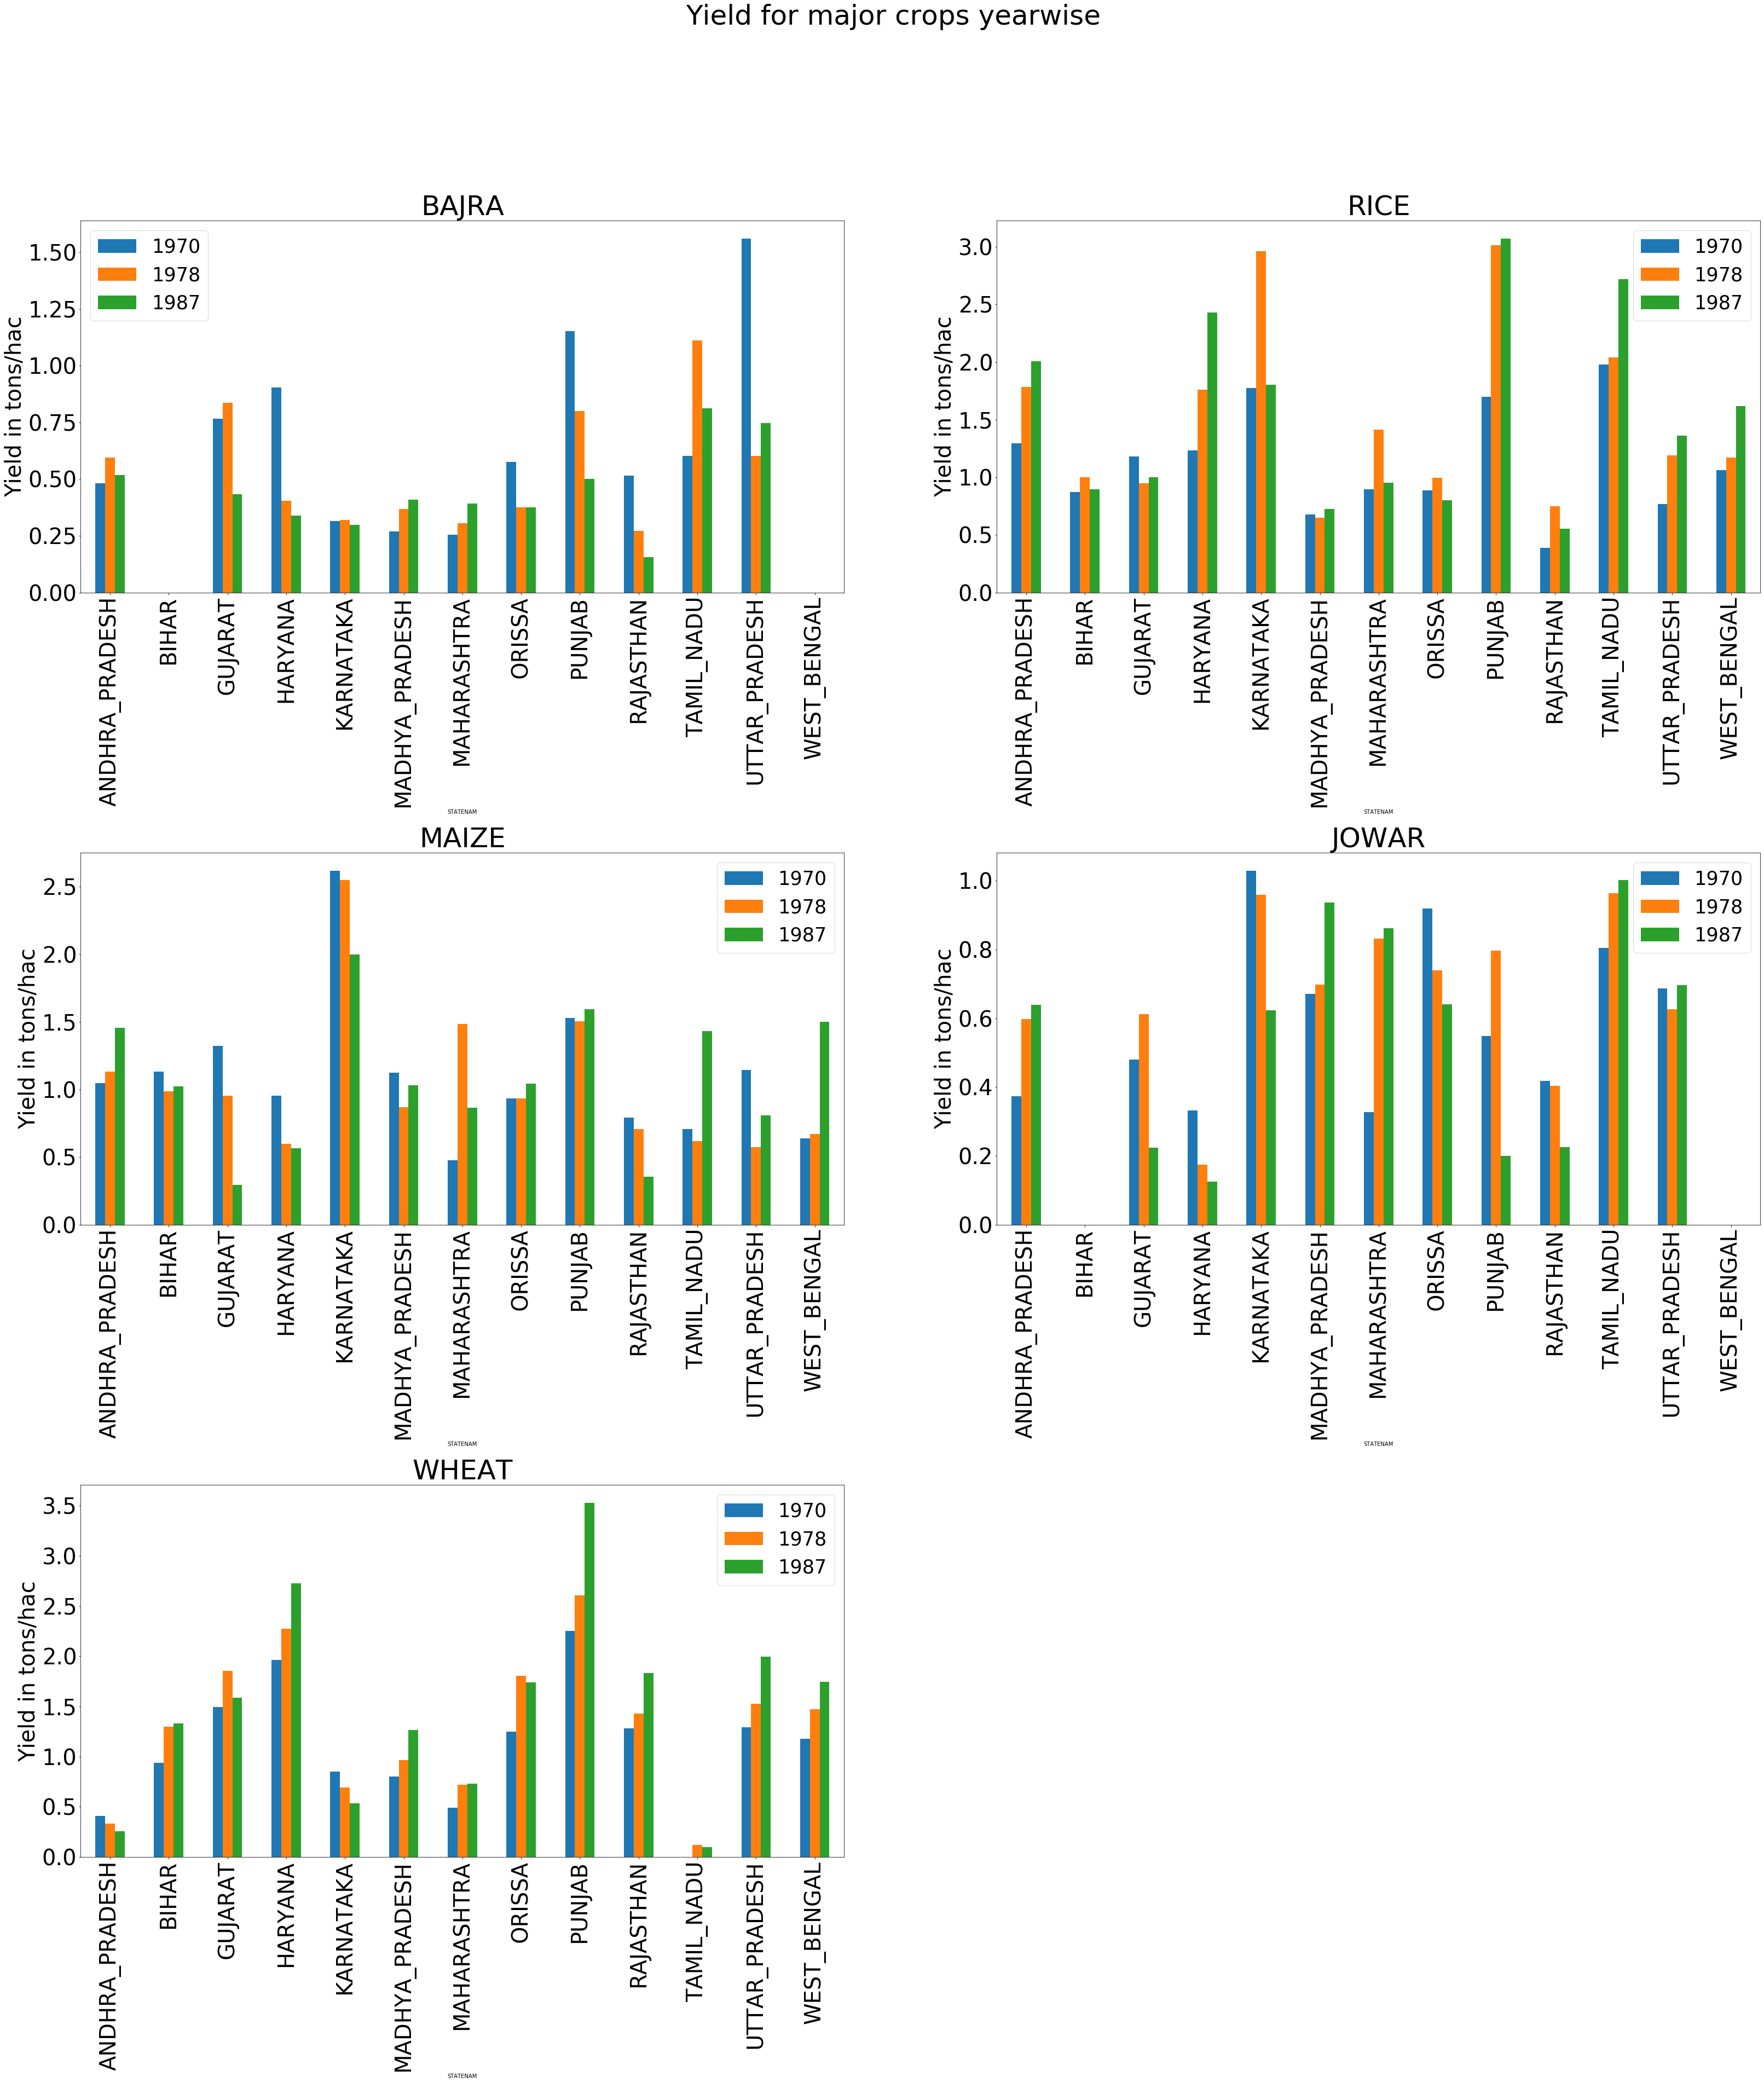

In [293]:
production_state_wise = all_data.groupby(['STATENAM','YEAR']).mean()[['YBAJRA','YRICE','YMAIZE','YJOWAR','YWHEAT']]
fig,ax = plt.subplots(3,2,figsize=(55,55),gridspec_kw={'hspace':0.7})
ax[2][1].set_visible(False)
axes=ax.flatten()
for i,name in enumerate(list(production_state_wise.columns)):
#     sns.barplot(x=production_state_wise.index,y=production_state_wise[name],ax=axes[i])
    production_state_wise[name].unstack().plot.bar(ax=axes[i])
#     axes[i].set_xticklabels(labels=list(production_state_wise.index),rotation=45)
    axes[i].set_ylabel("Yield in tons/hac",fontsize=40)
    axes[i].set_title(name[1:],fontsize=50)
    axes[i].tick_params(axis='both', which='major', labelsize=40)
    axes[i].legend(prop={'size':35})
plt.suptitle('Yield for major crops yearwise',fontsize=50)
plt.savefig('Yield_statewise.png')
plt.show()

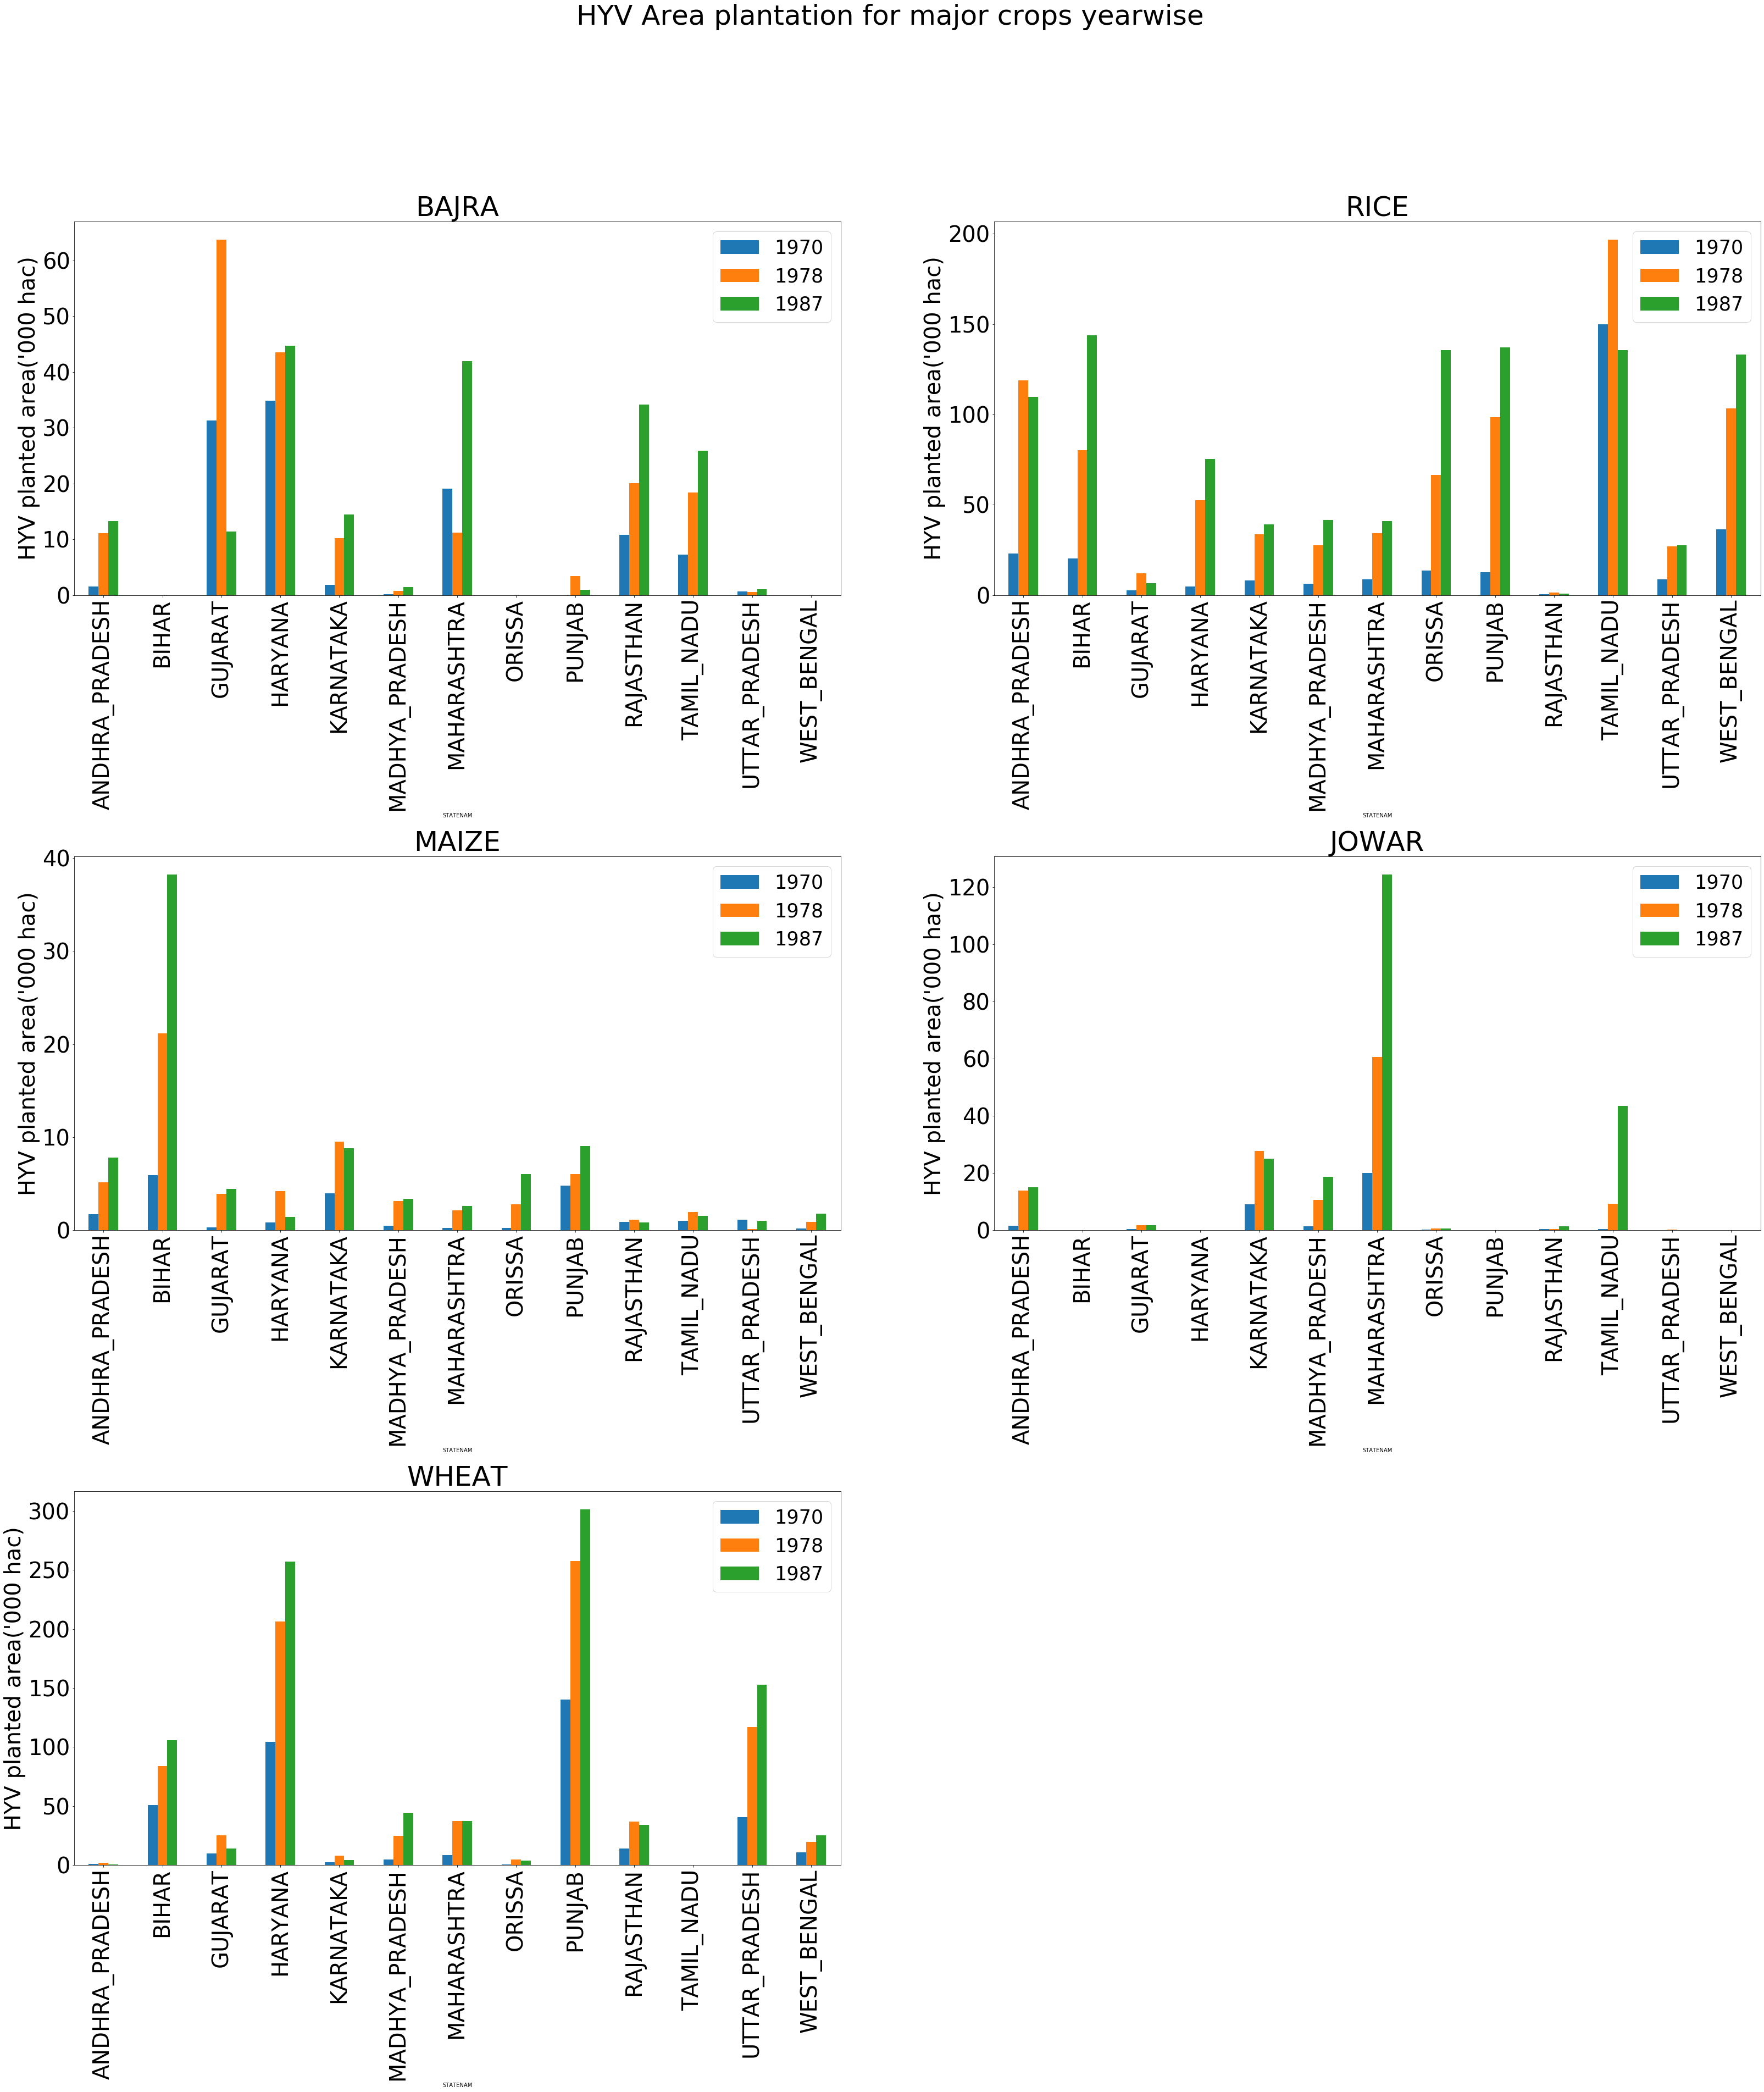

In [295]:
HYV_state_wise = all_data.groupby(['STATENAM','YEAR']).mean()[['HYVBAJRA','HYVRICE','HYVMAIZE','HYVJOWAR','HYVWHEAT']]
fig,ax = plt.subplots(3,2,figsize=(55,55),gridspec_kw={'hspace':0.7})
ax[2][1].set_visible(False)
axes=ax.flatten()
for i,name in enumerate(list(HYV_state_wise.columns)):
#     sns.barplot(x=production_state_wise.index,y=production_state_wise[name],ax=axes[i])
    HYV_state_wise[name].unstack().plot.bar(ax=axes[i])
#     axes[i].set_xticklabels(labels=list(production_state_wise.index),rotation=45)
    axes[i].set_ylabel("HYV planted area('000 hac)",fontsize=40)
    axes[i].set_title(name[3:],fontsize=50)
    axes[i].tick_params(axis='both', which='major', labelsize=40)
    axes[i].legend(prop={'size':35})
plt.suptitle('HYV Area plantation for major crops yearwise',fontsize=50)
plt.savefig('HYV_statenwise.png')
plt.show()

# GCANCA -> multiple cropping index

In [48]:
McropInd_state_wise = all_data.groupby(['STATENAM','YEAR']).mean()[['multiple_crop_index']]
plt.figure(figsize=(10,5))
McropInd_state_wise.unstack().plot.bar(ax=plt.gca())
plt.title('Multiple cropping Index - GCANCA')
plt.savefig('GCANCA.png')

# NIANCA - >  irrigation intensity index

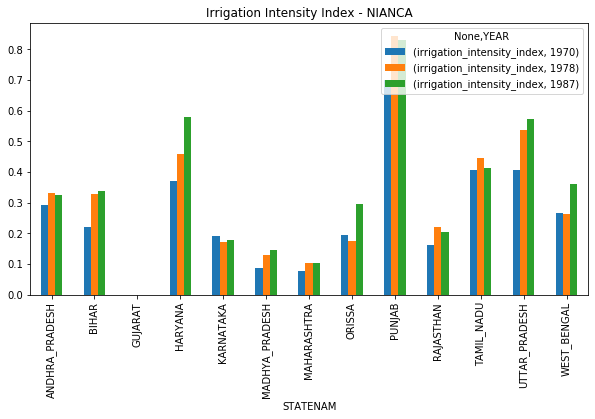

In [69]:
MirrInd_state_wise = all_data.groupby(['STATENAM','YEAR']).mean()[['irrigation_intensity_index']]
plt.figure(figsize=(10,5))
MirrInd_state_wise.unstack().plot.bar(ax=plt.gca())
plt.title('Irrigation Intensity Index - NIANCA')
plt.savefig('NIANCA.png')

In [15]:
val = []
for name in data_1970.columns:
    if name[:2]=='DM':
        val.append(name)

In [16]:
val = val[:15]

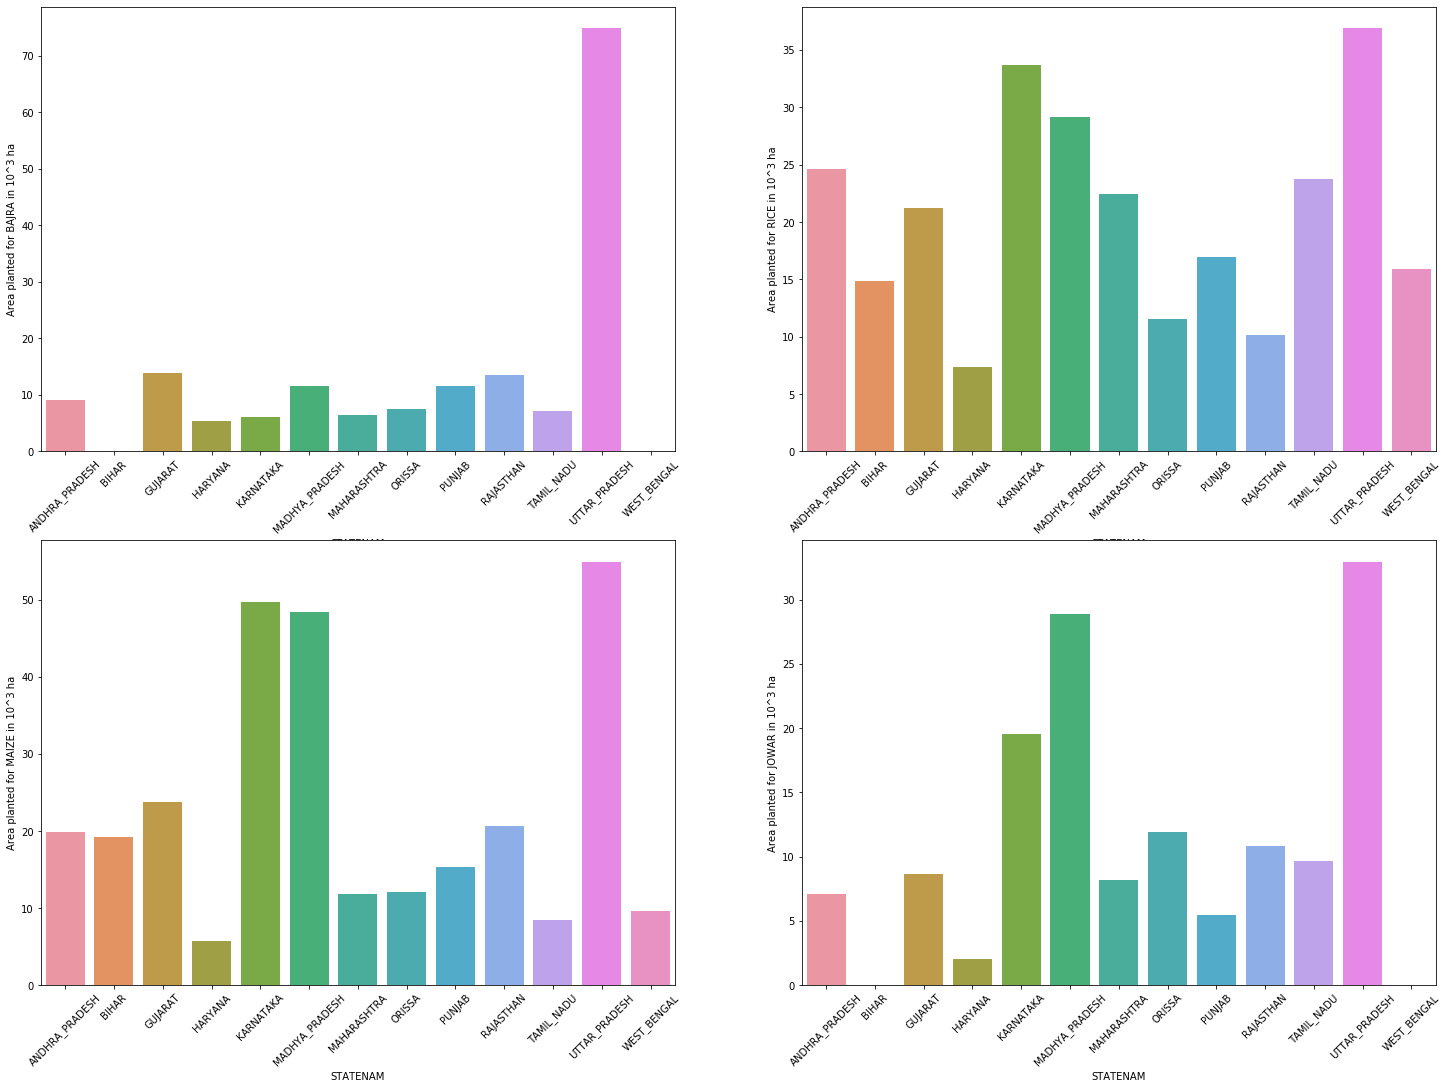

In [17]:
fig,axes = plt.subplots(2,2,figsize=(25,18))
axes=axes.flatten()
for i,name in enumerate(list(area_state_wise.columns)):
    sns.barplot(x=area_state_wise.index,y=area_state_wise[name],ax=axes[i])
    axes[i].set_xticklabels(labels=list(area_state_wise.index),rotation=45)
    axes[i].set_ylabel("Area planted for " +name[1:]+" in 10^3 ha")
plt.savefig('areaVstatename.png')

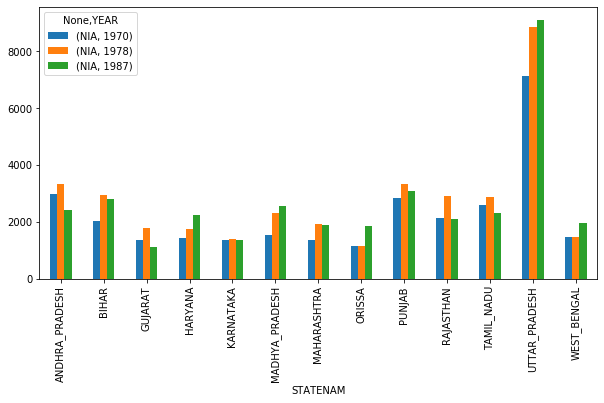

In [18]:
NIA_state_wise = all_data.groupby(['STATENAM','YEAR']).sum()[['NIA']]
plt.figure(figsize=(10,5))
NIA_state_wise.unstack().plot.bar(ax=plt.gca())
plt.savefig('NIA_yearwise.png')

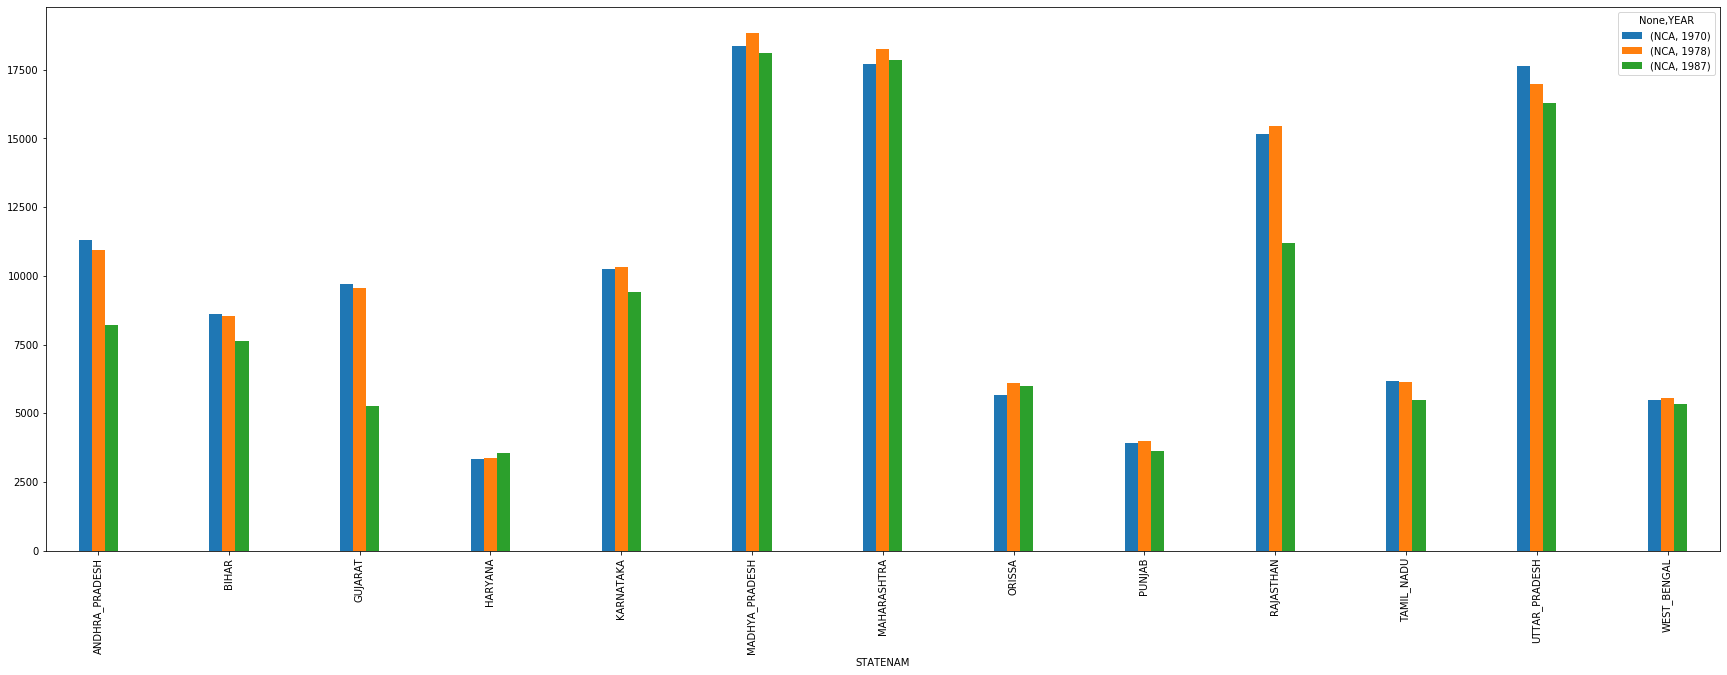

In [19]:
NIA_state_wise = all_data.groupby(['STATENAM','YEAR']).sum()[['NCA']]
plt.figure(figsize=(30,10))
NIA_state_wise.unstack().plot.bar(ax=plt.gca(),width=0.3)
plt.savefig('NCA_yearwise.png')

### Top soil depth 

In [24]:
#top soil depth
var = []
for col in Bdata_1970.columns:
    if col[:4]=='DMS':
        var.append(col)

In [26]:
ph_data = Bdata_1970[var]
x = ph_data.stack()
ph_var = pd.Series(pd.Categorical(x[x!=0].index.get_level_values(1)))
Bdata_1970['top_soil_depth'] = ph_var

Text(0.5, 0.98, 'Yield V/s Top soil depth')

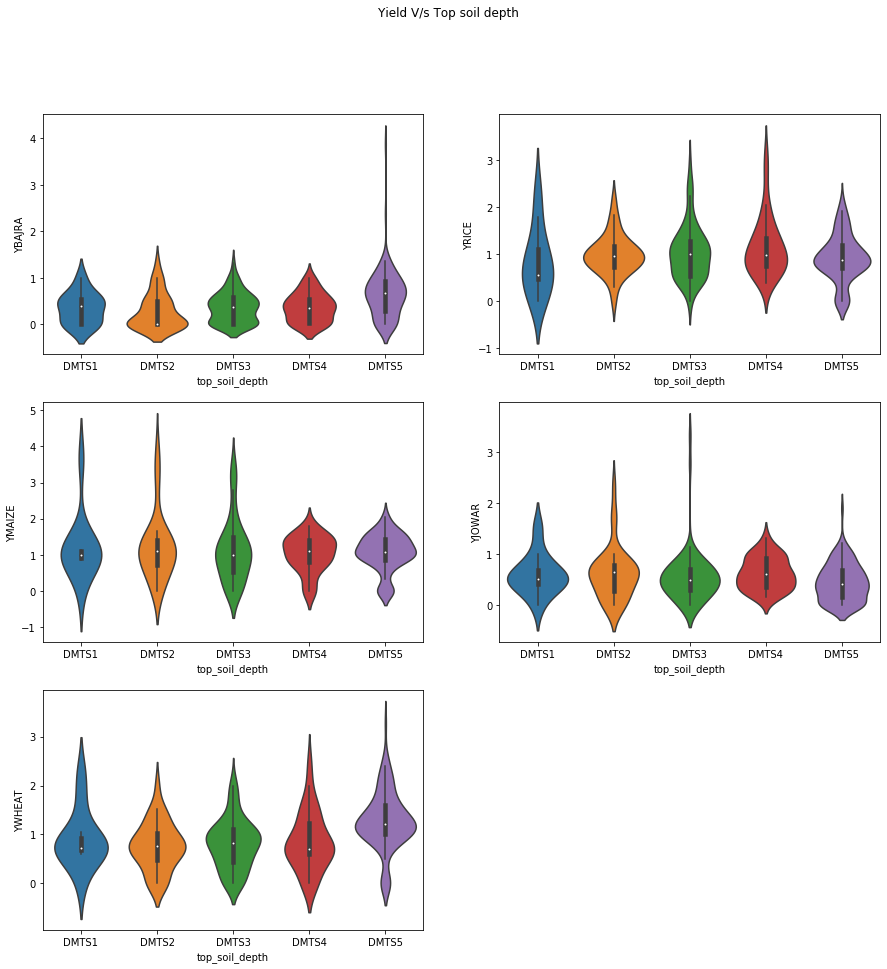

In [30]:
fig,ax = plt.subplots(3,2,figsize=(15,15))
ax[2][1].set_visible(False)
axes = ax.flatten()
for i,name in enumerate(crops):
    if(i<=4):
        sns.boxplot(x='top_soil_depth',y=name,data=Bdata_1970,ax=axes[i])
#         axes[i].tick_params(axis='both', which='major', labelsize=40)
#         axes[i].legend(prop={'size':35})
plt.suptitle('Yield V/s Top soil depth')
plt.savefig('Topsoildepth_boxplot.png')

### SOil Type

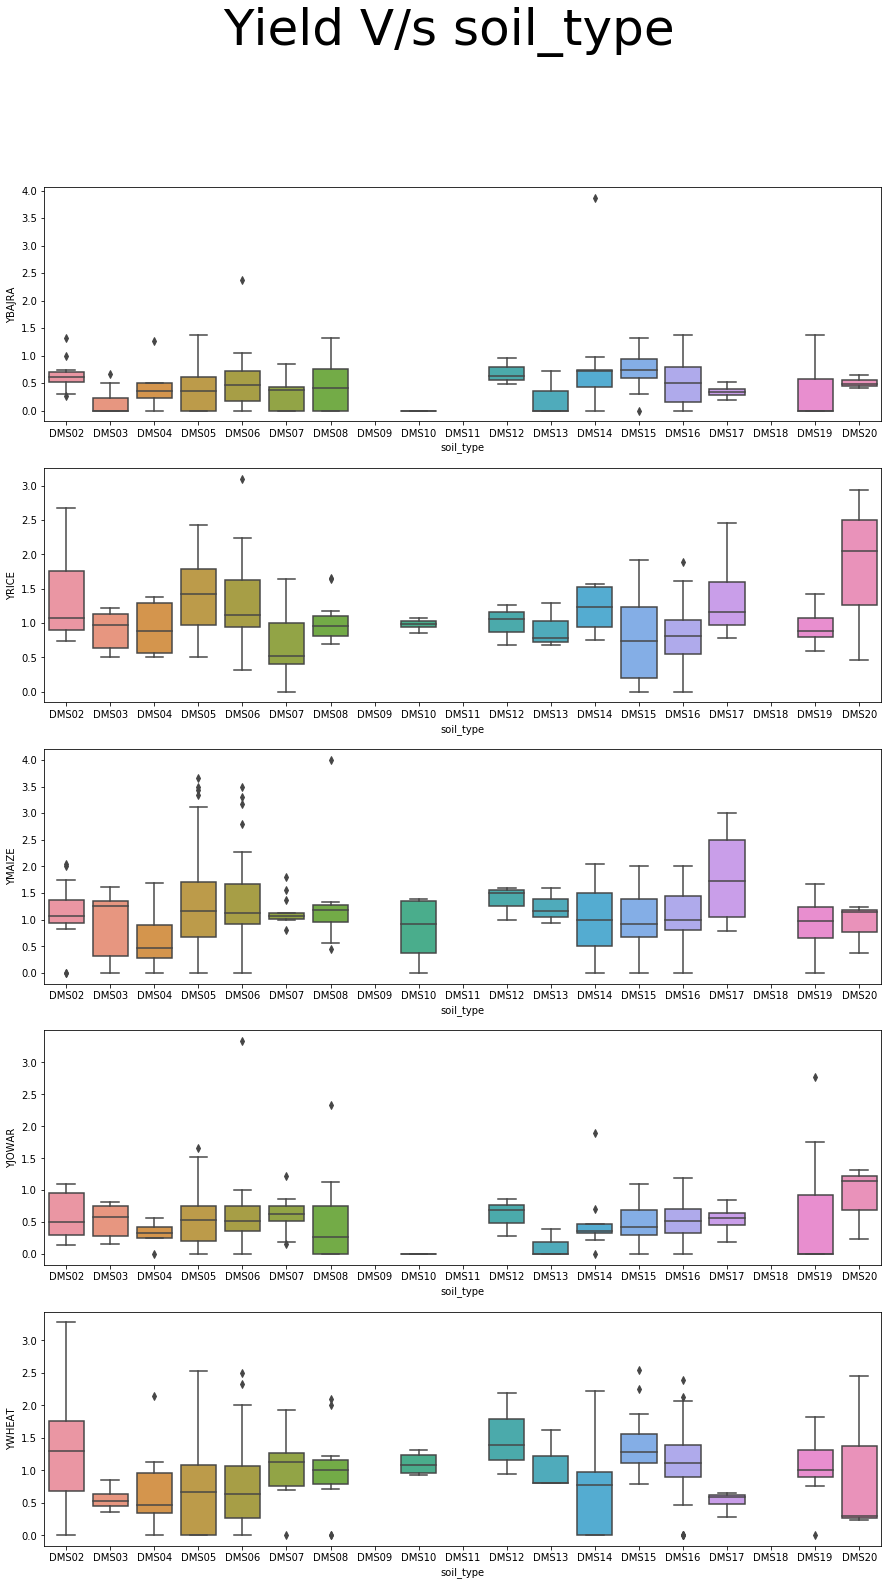

In [46]:

var = []
for col in Bdata_1970.columns:
    if col[:3]=='DMS' and len(col)==5:
        var.append(col)
ph_data = Bdata_1970[var[1:-1]]
x = ph_data.stack()
ph_var = pd.Series(pd.Categorical(x[x!=0].index.get_level_values(1)))
Bdata_1970['soil_type'] = ph_var

fig,ax = plt.subplots(5,1,figsize=(15,25))
# ax[2][1].set_visible(False)
axes = ax.flatten()
for i,name in enumerate(crops):
    if(i<=4):
        sns.boxplot(x='soil_type',y=name,data=Bdata_1970,ax=axes[i])
#         axes[i].tick_params(axis='both', which='major', labelsize=40)
#         axes[i].legend(prop={'size':35})
plt.suptitle('Yield V/s soil_type',fontsize=50)
plt.savefig('soilType_boxplot.png')

### Aquifier depth

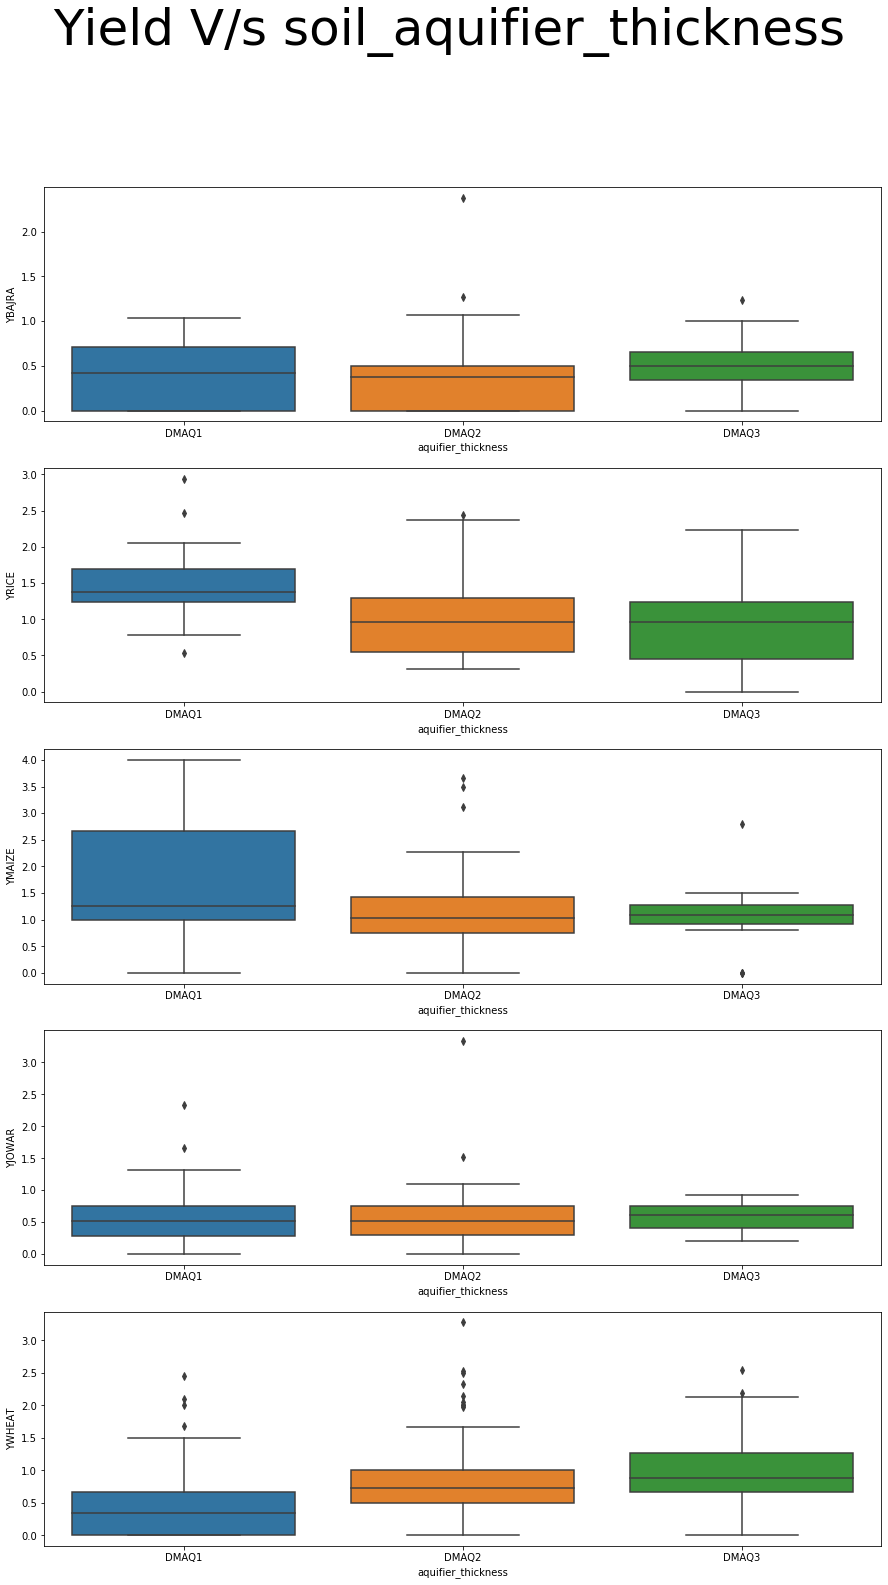

In [45]:

var = []
for col in Bdata_1970.columns:
    if col[:4]=='DMAQ':
        var.append(col)
ph_data = Bdata_1970[var]
x = ph_data.stack()
ph_var = pd.Series(pd.Categorical(x[x!=0].index.get_level_values(1)))
Bdata_1970['aquifier_thickness'] = ph_var

fig,ax = plt.subplots(5,1,figsize=(15,25))
# ax[2][1].set_visible(False)
axes = ax.flatten()
for i,name in enumerate(crops):
    if(i<=4):
        sns.boxplot(x='aquifier_thickness',y=name,data=Bdata_1970,ax=axes[i])
#         axes[i].tick_params(axis='both', which='major', labelsize=40)
#         axes[i].legend(prop={'size':35})
plt.suptitle('Yield V/s soil_aquifier_thickness',fontsize=50)
plt.savefig('AQUIFIER_thickness_boxplot.png')

### SOIL PH

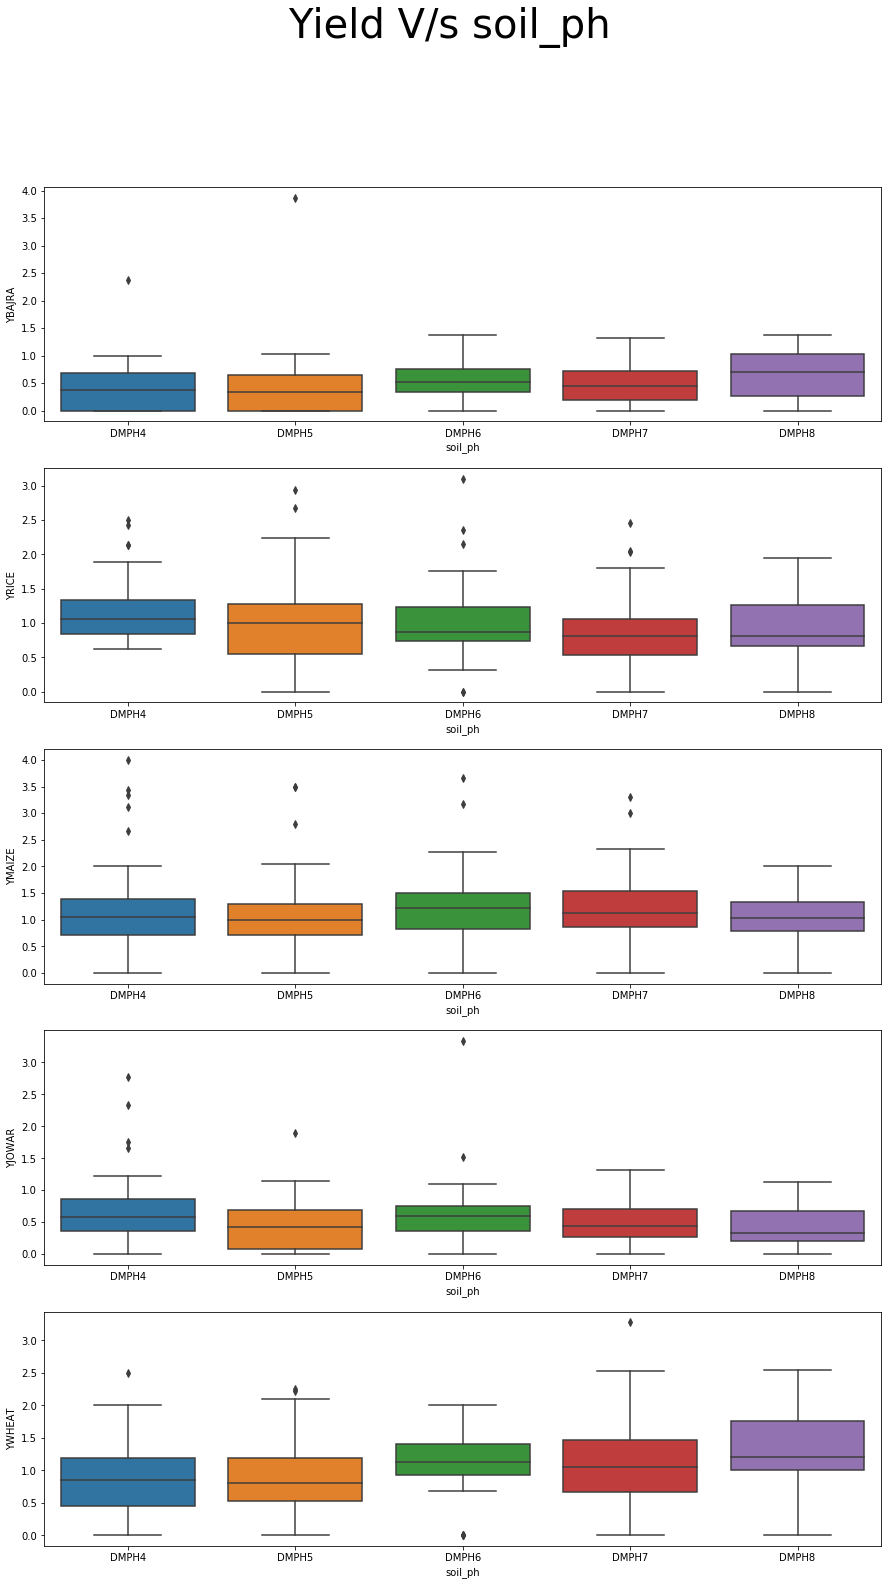

In [44]:

var = []
for col in Bdata_1970.columns:
    if col[:4]=='DMPH':
        var.append(col)
ph_data = Bdata_1970[var]
x = ph_data.stack()
ph_var = pd.Series(pd.Categorical(x[x!=0].index.get_level_values(1)))
Bdata_1970['soil_ph'] = ph_var

fig,ax = plt.subplots(5,1,figsize=(15,25))
# ax[2][1].set_visible(False)
axes = ax.flatten()
for i,name in enumerate(crops):
    if(i<=4):
        sns.boxplot(x='soil_ph',y=name,data=Bdata_1970,ax=axes[i])
#         axes[i].tick_params(axis='both', which='major', labelsize=40)
#         axes[i].legend(prop={'size':35})
plt.suptitle('Yield V/s soil_ph',fontsize=40)
plt.savefig('soil_phYield_boxplot.png')

# Bajra

In [42]:
prod = data_1970['YMAIZE']*data_1970['PMAIZE']*data_1970['AMAIZE']
descr = data_1970['COSTNITR'].values


In [43]:
area.max()

1462.971

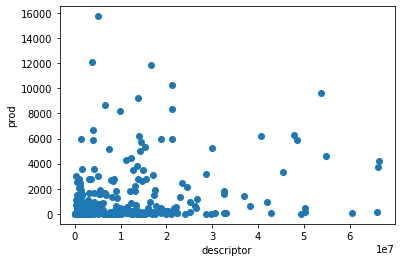

In [44]:
import matplotlib.pyplot as plt
plt.scatter(descr,prod)
plt.ylabel('prod')
plt.xlabel('descriptor')
plt.show()

In [421]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(area,prod_b)
lr.score(area,prod_b)

0.2157103251690018

In [422]:
lr.coef_

array([ 1.83863483e-03,  7.32532983e-05,  2.20292133e-04, -5.23847255e-03,
       -2.62072882e-02,  5.42592836e-01,  3.47996886e-01, -1.89719458e-01,
       -2.70009040e-02,  2.82104793e-01,  3.95954109e-01, -6.50233322e-01,
       -3.33486142e-02,  3.70481083e-01, -3.46668343e-01, -6.67318853e-01,
        2.19537646e-01, -1.07121867e-01,  4.76769714e-01])

In [88]:
prod_b.max()

456.0